#### Problem Statement: 
To analyze the behavioral patterns of credit card transactions and develop a Random Forest Classifier to detect fraudulent activities. As credit card fraud continues to be a significant concern for financial institutions and consumers alike, it is crucial to identify and prevent fraudulent transactions effectively. This project aims to leverage machine learning techniques, specifically the Random Forest algorithm, to classify transactions as either legitimate or fraudulent based on various behavioral features. The analysis will involve exploring transaction data, identifying key patterns associated with fraud, and training a Random Forest Classifier to enhance the accuracy of fraud detection systems. The ultimate goal is to reduce financial losses due to fraud and improve the overall security of credit card transactions.

As Data Scientist, my role is to analyze credit card transaction data to identify patterns and behaviors associated with fraudulent activities. I will utilize statistical analysis and machine learning techniques, specifically the Random Forest Classifier, to develop a robust model that can accurately classify transactions as either legitimate or fraudulent. This involves data preprocessing, feature engineering, model training, and evaluation to ensure the effectiveness of the fraud detection system. My objective is to provide insights and tools that can help financial institutions mitigate the risks of credit card fraud and enhance transaction security.

#### A. Data Preparation and Data Exploration Analysis

1. Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
chunk_size = 100000
chunks = pd.read_csv('credit_card_transactions.csv', chunksize = chunk_size)
transactions_df = pd.concat(chunks, ignore_index = True)

In [3]:
# Data information
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

- trans_date_trans_time is the data and time of the transactions
- cc_num is the credit card number 
- merchant is the merchant name or store name where the transaction occurred
- category is the category of the transaction (e.g., groceries, electronics)
- amt is the transaction amount
- first and last are the first and last names of the cardholder
- gender is the gender of the cardholder
- street is the street address of the cardholder
- city is the city of the cardholder
- state is the state of the cardholder
- zip is the zip code of the cardholder
- lat and long are the latitude and longitude of the merchant location (geographic coordinates of the transaction)
- city_pop is the population of the city where the transaction occurred
- job is the job title of the cardholder
- dob is the date of birth of the cardholder
- trans_num is the transaction number
- unix_time is the Unix timestamp of the transaction
- merch_lat and merch_long are the latitude and longitude of the merchant location
- is_fraud indicates whether the transaction is fraudulent (1) or not (0)
- merch_zipcode is the zip code of the merchant location

In [4]:
# First five rows of the dataset
transactions_df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  merch_zipcode  
0        0        28705.0  
1        0            NaN  
2        0        83236.0  
3        0            NaN  
4        0        22844.0  

[5 rows x 24 columns]

In [5]:
# Check for missing values
print(transactions_df.isna().sum())

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64


In [6]:
# Percentage of missing values
missing_percentage = transactions_df.isna().mean() * 100
print(missing_percentage)

Unnamed: 0                0.000000
trans_date_trans_time     0.000000
cc_num                    0.000000
merchant                  0.000000
category                  0.000000
amt                       0.000000
first                     0.000000
last                      0.000000
gender                    0.000000
street                    0.000000
city                      0.000000
state                     0.000000
zip                       0.000000
lat                       0.000000
long                      0.000000
city_pop                  0.000000
job                       0.000000
dob                       0.000000
trans_num                 0.000000
unix_time                 0.000000
merch_lat                 0.000000
merch_long                0.000000
is_fraud                  0.000000
merch_zipcode            15.113502
dtype: float64


2. Data Cleaning

In [7]:
# merch_zipcode missing 15.11% values, and we have merch_long and merch_lat, so we can drop this column
# Unnamed: 0 is just an index column, so we can drop it as well
# 'first' and 'last' columns are name and surname of the cardholder, which are not useful for analysis
transactions_df.drop(columns = ['merch_zipcode', 'Unnamed: 0', 'first', 'last'], inplace = True)

In [8]:
# Check the update after drpping columns
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   street                 1296675 non-null  object 
 7   city                   1296675 non-null  object 
 8   state                  1296675 non-null  object 
 9   zip                    1296675 non-null  int64  
 10  lat                    1296675 non-null  float64
 11  long                   1296675 non-null  float64
 12  city_pop               1296675 non-null  int64  
 13  job                    1296675 non-null  object 
 14  dob               

In [9]:
# Covert trans_data_tras_time to datatime format
transactions_df['trans_date_trans_time'] = pd.to_datetime(transactions_df['trans_date_trans_time'])

In [10]:
# Extract date and time features
transactions_df['hour'] = transactions_df['trans_date_trans_time'].dt.hour
transactions_df['day_of_week'] = transactions_df['trans_date_trans_time'].dt.day_name()
transactions_df['month'] = transactions_df['trans_date_trans_time'].dt.month

In [11]:
# Convert 'dob' to datetime format
transactions_df['dob'] = pd.to_datetime(transactions_df['dob'])
# Calculate age at the time of the transaction
transactions_df['age'] = (transactions_df['trans_date_trans_time'] - transactions_df['dob']).dt.days // 365

In [12]:
# Check the date range of the dataset
start_date = transactions_df['trans_date_trans_time'].min()
end_date = transactions_df['trans_date_trans_time'].max()
print(f'Date range of the dataset: {start_date} to {end_date}')

Date range of the dataset: 2019-01-01 00:00:18 to 2020-06-21 12:13:37


For best time window, we will data from 2019-01-01 to 2019-12-31 instead of the entire dataset from 2019-01-01 to 2020-06-21. Entire dataset leads count transaction per month may not be accurate as the dataset is not complete for the entire year of 2020.

In [13]:
# Filter the dataset for the year 2019
transactions_df = transactions_df[(transactions_df['trans_date_trans_time'] >= '2019-01-01') & (transactions_df['trans_date_trans_time'] < '2020-01-01')]

In [14]:
# Check the updated dateset
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924850 entries, 0 to 924849
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  924850 non-null  datetime64[ns]
 1   cc_num                 924850 non-null  int64         
 2   merchant               924850 non-null  object        
 3   category               924850 non-null  object        
 4   amt                    924850 non-null  float64       
 5   gender                 924850 non-null  object        
 6   street                 924850 non-null  object        
 7   city                   924850 non-null  object        
 8   state                  924850 non-null  object        
 9   zip                    924850 non-null  int64         
 10  lat                    924850 non-null  float64       
 11  long                   924850 non-null  float64       
 12  city_pop               924850 non-null  int64    

3. Feature Engineering

In [15]:
# The 'amt' describes the amount of the transaction
print(transactions_df['amt'].describe())

count    924850.000000
mean         70.265398
std         161.713382
min           1.000000
25%           9.630000
50%          47.400000
75%          83.020000
max       28948.900000
Name: amt, dtype: float64


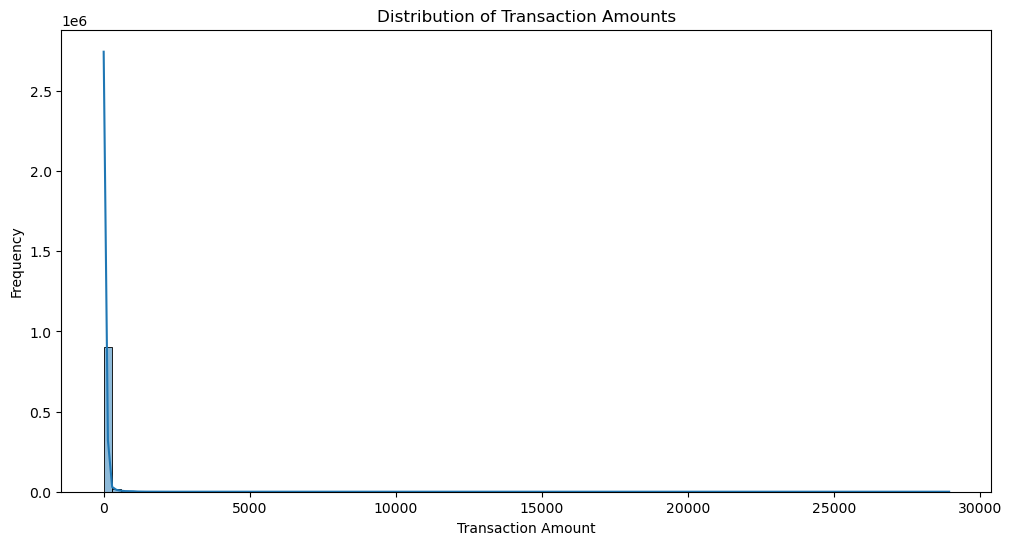

In [16]:
# Explore the 'amt' column
plt.figure(figsize = (12,6))
sns.histplot(transactions_df['amt'], bins = 100, kde = True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Create spending categories based on transaction amount
def categorize_spending(amount):
    if amount < 10:
        return 'Very Low'
    elif 10 <= amount < 50:
        return 'Low'
    elif 50 <= amount < 100:
        return 'Medium'
    elif 100 <= amount < 500:
        return 'High Medium'
    else:
        return 'High'
    
transactions_df['spending_category'] = transactions_df['amt'].apply(categorize_spending)

Transaction Counts by Speending Category:
spending_category
Medium         277511
Low            240405
Very Low       239860
High Medium    155970
High            11104
Name: count, dtype: int64

Percentage of Transactions by Spending Category:
spending_category
Medium         30.006055
Low            25.993945
Very Low       25.935016
High Medium    16.864356
High            1.200627
Name: proportion, dtype: float64


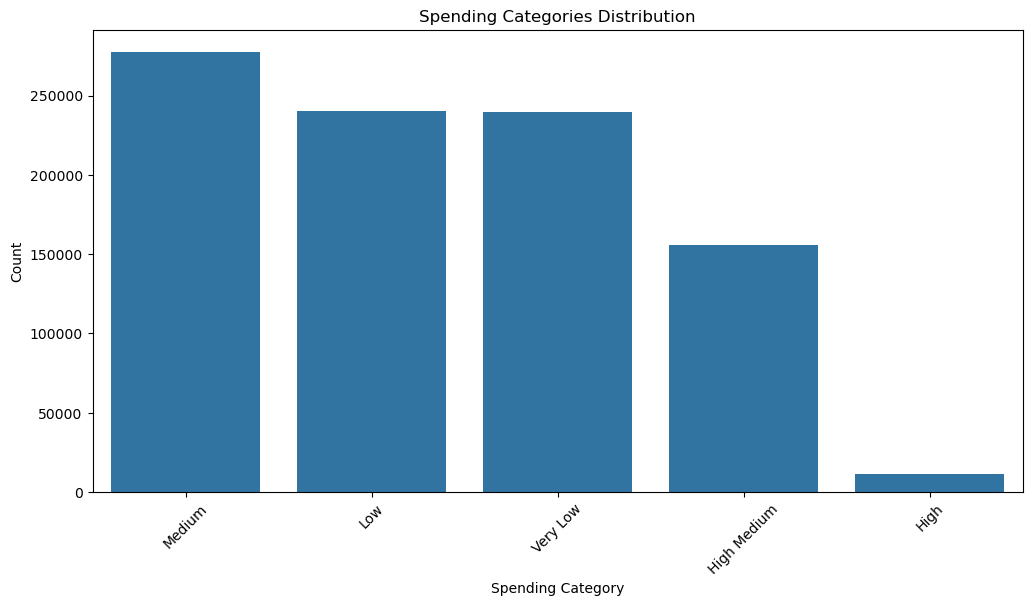

In [18]:
# Explore spending categories
print('Transaction Counts by Speending Category:')
print(transactions_df['spending_category'].value_counts())
print('\nPercentage of Transactions by Spending Category:')
print(transactions_df['spending_category'].value_counts(normalize=True) * 100)
# Visualize spending categories distribution
plt.figure(figsize = (12, 6))
sns.countplot(data = transactions_df,
              x= 'spending_category',
              order = transactions_df['spending_category'].value_counts().index)
plt.title('Spending Categories Distribution')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [19]:
# The city population can be a factor in transaction behavior
print(transactions_df['city_pop'].describe())

count    9.248500e+05
mean     8.914480e+04
std      3.025527e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.047800e+04
max      2.906700e+06
Name: city_pop, dtype: float64


In [20]:
# Create population categories
def categorize_population(population):
    if population < 2500:
        return 'rural'
    elif 2500 <= population < 10000:
        return 'small town'
    elif 10000 <= population < 50000:
        return 'town'
    elif 50000 <= population < 1000000:
        return 'city'
    else:
        return 'metropolis'

transactions_df['population_category'] = transactions_df['city_pop'].apply(categorize_population)
    


Counts by Population Category:
population_category
rural         464638
small town    181930
city          150120
town          104704
metropolis     23458
Name: count, dtype: int64

Percentage of Transactions by Population Category:
population_category
rural         50.239282
small town    19.671298
city          16.231821
town          11.321187
metropolis     2.536411
Name: proportion, dtype: float64


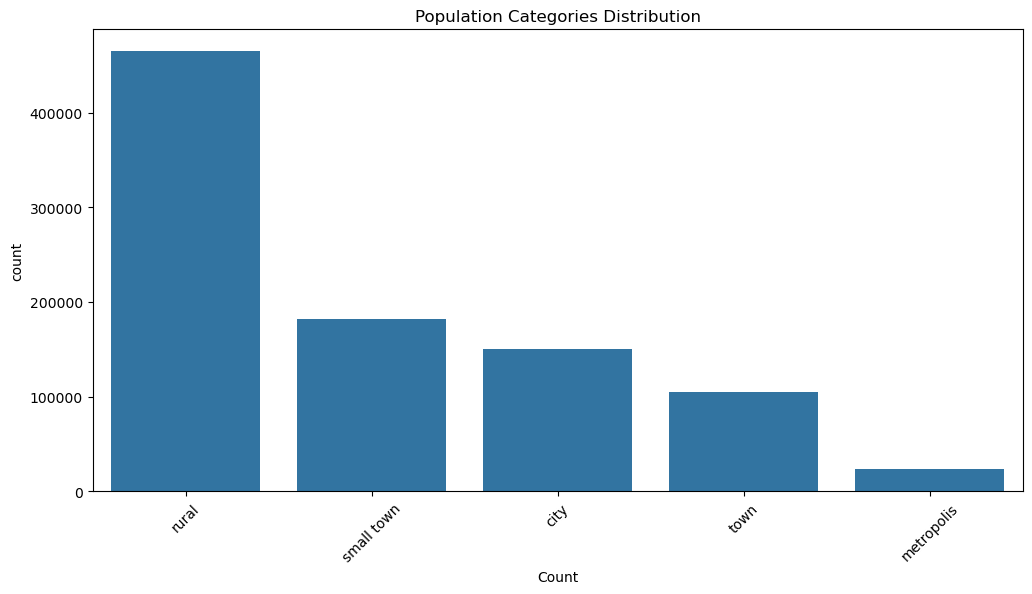

In [21]:
# Expore population categories
print('Counts by Population Category:')
print(transactions_df['population_category'].value_counts())
print('\nPercentage of Transactions by Population Category:')
print(transactions_df['population_category'].value_counts(normalize = True) * 100)
plt.figure(figsize = (12, 6))
sns.countplot(data = transactions_df,
              x= 'population_category',
              order = transactions_df['population_category'].value_counts().index)
plt.title('Population Categories Distribution')
plt.xlabel('Population Category')
plt.xlabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [22]:
# Create age categories
def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 25:
        return '18-24'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    elif 55 <= age < 65:
        return '55-64'
    else:
        return '65 and over'
transactions_df['age_category'] = transactions_df['age'].apply(categorize_age)

Behavioral Analysis

1. When: Temporal analysis

1. 1 Hourly trend: Examine transaction frequency and amount hour to indentify peak spending times.

In [23]:
# Transaction count and average amount by hour
hourly_trends = transactions_df.groupby('hour').agg({'amt': ['count', 'mean']}).reset_index()
hourly_trends.columns = ['hour', 'transaction_count', 'average_amount']

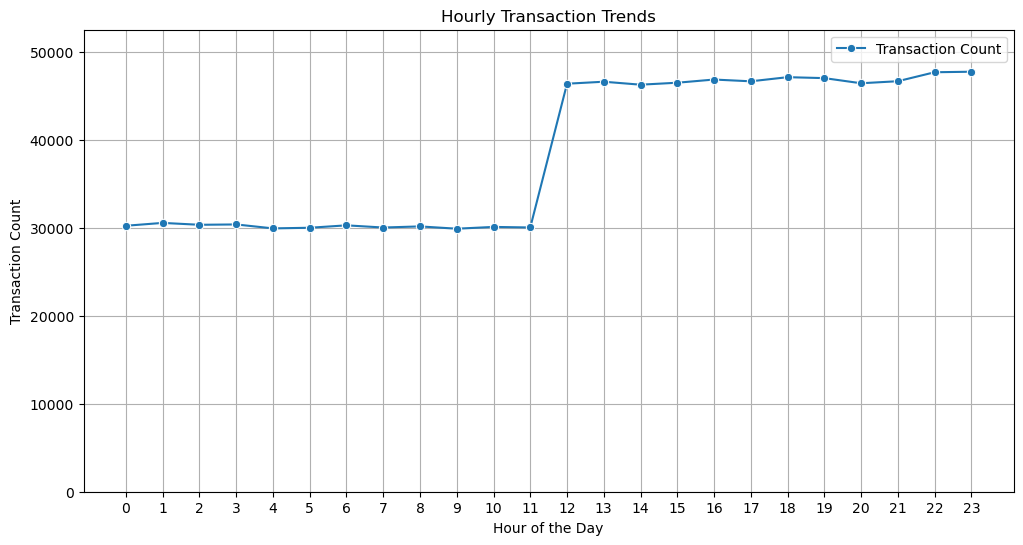

In [24]:
# Plot hourly trends
plt.figure(figsize = (12, 6))
sns.lineplot(data =hourly_trends, x= 'hour', y = 'transaction_count', marker = 'o', label = 'Transaction Count')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend()
plt.xticks(range(0, 24))
plt.ylim(0, hourly_trends['transaction_count'].max() * 1.1)
plt.grid()
plt.show()

Insights: Hourly trends show peak transaction times, which can help in resource allocation and fraudulent activity monitoring. Peak hours can be target for marketing campaigns or customer engaging strategies. From the plot, we can see that transaction count peaks around 12 PM to 11 PM, with a significant drop during the early morning hours (1 AM to 11 AM). This suggests that most transaction activity occurs during the after noon and evening hours, which is typical for consumer spending behavior.

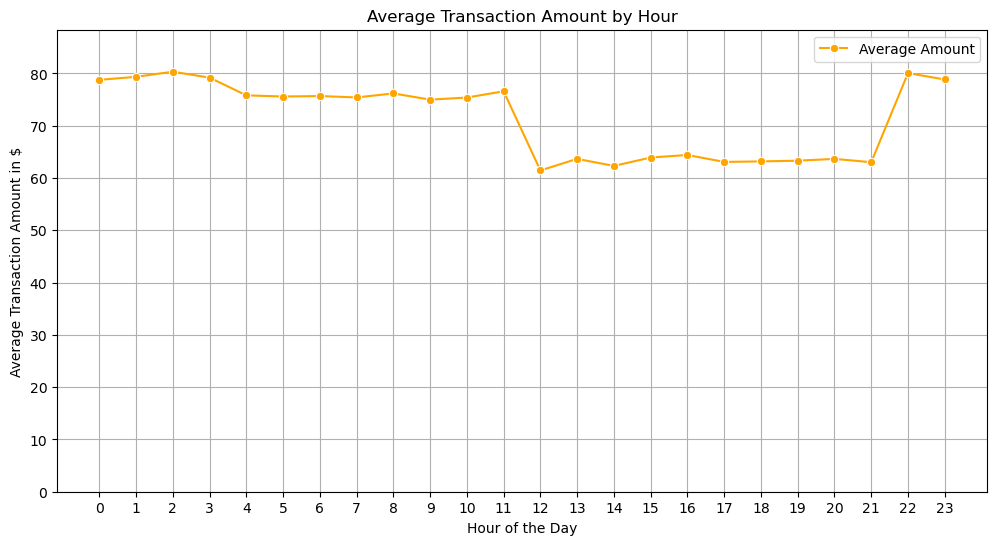

In [25]:
# plot average transaction amount by hour
plt.figure(figsize = (12, 6))
sns.lineplot(data = hourly_trends,
             x = 'hour',
             y = 'average_amount',
             marker = 'o',
             color = 'orange',
             label = 'Average Amount')
plt.title('Average Transaction Amount by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Transaction Amount in $')
plt.legend()
plt.xticks(range(0, 24))
plt.ylim(0, hourly_trends['average_amount'].max() * 1.1)
plt.grid()
plt.show()

Insights: The average transaction amount is highest around 10 PM and 2 AM, and lowest arount 12 PM. The average transaction amount tends to be higher during the late night hours to 11 AM, which may indicate that customers are marking larger purchases during these times. From 12 PM to 9 PM, the average transacton amount is relatively stable lower than the peak hours, suggesting that customers are making smaller purchases during the day.

Define Kruskal-Wallis H-test is a non-parametric method used to compare three or more independent samples to determine if there are statistically significant differences between their distributions. It is an extension of the Mann-Whitney U test and is used when the assumptions of ANOVA are not met.

Formula: H = (12 / (N * (N + 1))) * Σ (Ri^2 / ni) - 3 * (N + 1)

Where:

N = total number of observations

Ri = rank sum for each group

ni = number of observations in each group

In [26]:
from scipy.stats import kruskal

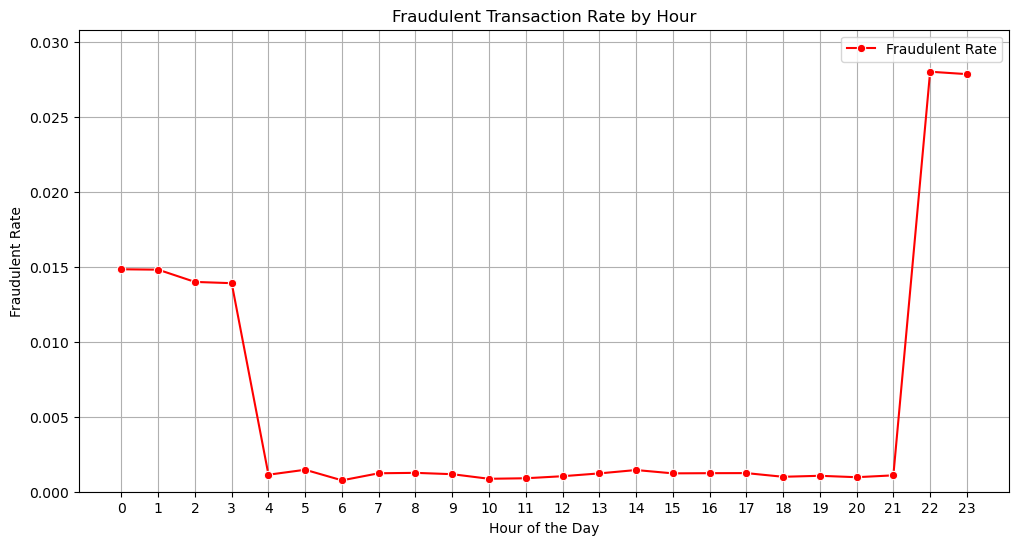

Kruskal-Wallis H-test: Statistics=12683.47123, p-value=0.00000
Significant differences in fraudulent rates across different hours.
      count      mean       std
hour                           
0     30266  0.014835  0.120895
1     30590  0.014809  0.120789
2     30375  0.013992  0.117458
3     30414  0.013908  0.117111
4     29965  0.001135  0.033666
5     30038  0.001465  0.038245
6     30312  0.000759  0.027536
7     30064  0.001231  0.035060
8     30191  0.001259  0.035456
9     29929  0.001169  0.034178
10    30133  0.000863  0.029362
11    30069  0.000898  0.029953
12    46428  0.001034  0.032137
13    46655  0.001222  0.034932
14    46318  0.001447  0.038006
15    46542  0.001225  0.034975
16    46903  0.001237  0.035144
17    46702  0.001242  0.035219
18    47172  0.000996  0.031550
19    47065  0.001062  0.032577
20    46480  0.000968  0.031101
21    46713  0.001092  0.033024
22    47733  0.028010  0.165003
23    47793  0.027849  0.164543


In [27]:
# Investigate transaction fraudulent rate by hour
fraudulent_rate_by_hour = transactions_df.groupby('hour')['is_fraud'].mean().reset_index()
plt.figure(figsize = (12, 6))
sns.lineplot(data = fraudulent_rate_by_hour,
             x = 'hour',
             y = 'is_fraud',
             marker = 'o',
             color = 'red',
             label = 'Fraudulent Rate')
plt.title('Fraudulent Transaction Rate by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraudulent Rate')
plt.legend()
plt.xticks(range(0, 24))
plt.ylim(0, fraudulent_rate_by_hour['is_fraud'].max() * 1.1)
plt.grid()
plt.show()
# Statistical test to check if fraudulent rates differ by hour
# Kruskal-Wallis H-test for transaction fraudulent rate by hour
# Use transactions_df which contains the 'hour' and 'is_fraud' columns
hours = sorted(transactions_df['hour'].unique())
groups = [transactions_df.loc[transactions_df['hour'] == h, 'is_fraud'].values for h in hours]

# Run Kruskal-Wallis test across hourly groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different hours.")
else:
    print("No significant differences in fraudulent rates across different hours.")

# Summary statistics by hour
print(transactions_df.groupby('hour')['is_fraud'].agg(['count', 'mean', 'std']))

Insights: There are significant differences in fraudulent rates across different hours, with higher rates observed during late night hours (10 PM to 3 AM). The fraudulent transaction rate is highest during the night hours starting from 10 PM to 3 AM, with a peak around 10 PM. This suggests that fraudulent activities are more likely to occur during the late night hours, which highlights the need for increased monitoring and security measures during these times. The rate of fraudulent transactions is significantly lower during 4 AM to 9 PM, indicating that most transactions during these hours are legitimate.

1. 2 Day of week trends: Compare spending behavior accross days of the week

In [28]:
# Transaction count and average amount by day of the week
day_of_week_trends = transactions_df.groupby('day_of_week').agg({'amt': ['count', 'mean']}).reset_index()
day_of_week_trends.columns = ['day_of_week', 'transaction_count', 'average_amount']
# Convert day_of_week to categorical type with ordered categories
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_trends['day_of_week'] = pd.Categorical(day_of_week_trends['day_of_week'], categories=day_of_week_order, ordered=True)

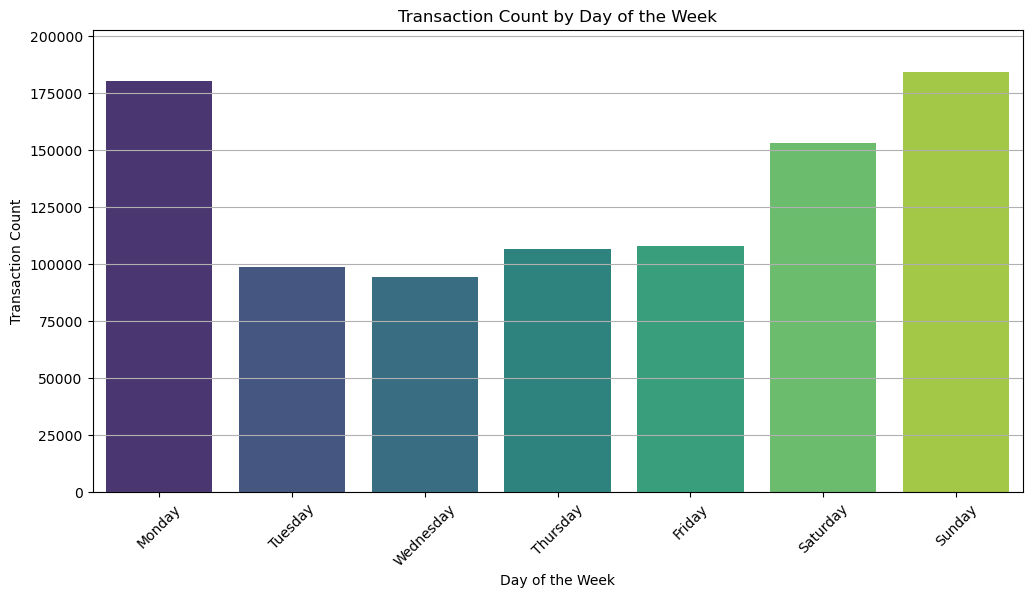

In [29]:
# Plot transaction count by day of the week
plt.figure(figsize = (12, 6))
sns.barplot(data = day_of_week_trends,
            x = 'day_of_week',
            y = 'transaction_count',
            order = day_of_week_order,
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation = 45)
plt.ylim(0, day_of_week_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Insights: Transaction count is highest on Monday and Sunday, with a significant drop on Tuesday and Wednesday, and a slight increase on Thursday to Monday. This suggests that customers tend to spend more on weekends and Mondays. This information can be used to optimize marketing strategies and resource allocation for businesses.

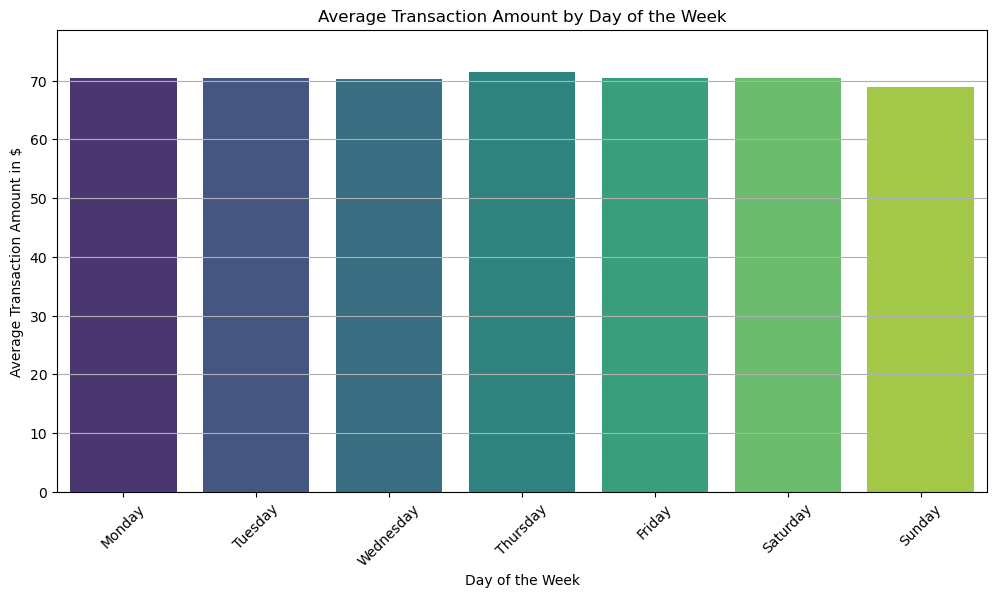

In [30]:
# Plot average transaction amount by day of the week
plt.figure(figsize = (12, 6))
sns.barplot(data = day_of_week_trends,
            x = 'day_of_week',
            y = 'average_amount',
            order = day_of_week_order,
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(rotation = 45)
plt.ylim(0, day_of_week_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Insights: The average transaction amount is highest on Thursay and lowest on Sunday. The average transaction of all days of the week is relatively stable around 70 USD, with a slight increase on Thurday and a slight decrease on Sunday.

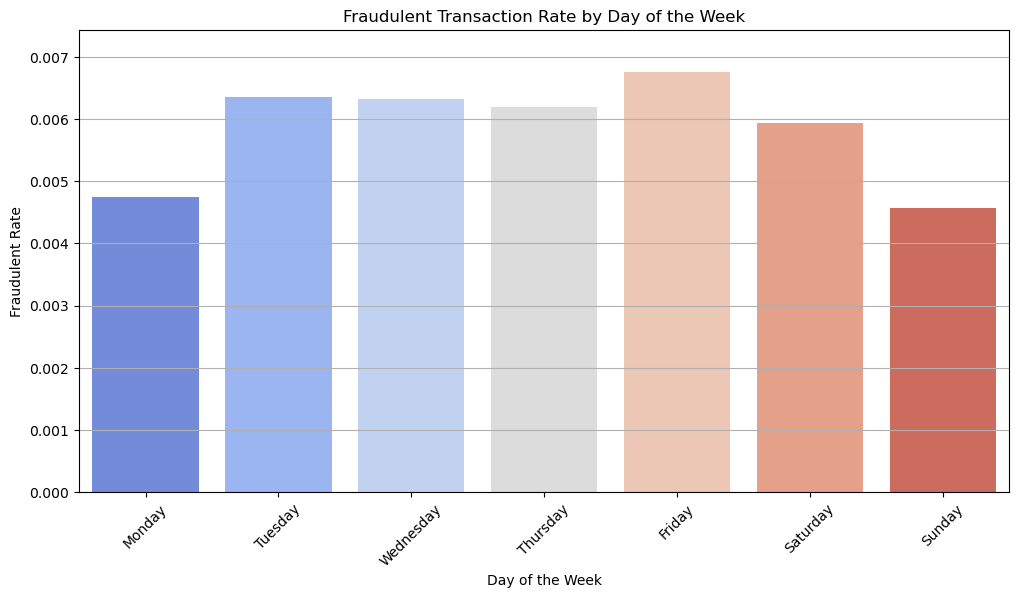

Kruskal-Wallis H-test: Statistics=112.13963, p-value=0.00000
Significant differences in fraudulent rates across different days.
              count      mean       std
day_of_week                            
Friday       107848  0.006760  0.081938
Monday       180492  0.004754  0.068783
Saturday     152892  0.005939  0.076835
Sunday       184237  0.004570  0.067449
Thursday     106403  0.006193  0.078455
Tuesday       98647  0.006356  0.079471
Wednesday     94331  0.006329  0.079302


In [31]:
# Investigate fraudulent transaction rate by day of the week
fraudulent_rate_by_day = transactions_df.groupby('day_of_week')['is_fraud'].mean().reset_index()
fraudulent_rate_by_day['day_of_week'] = pd.Categorical(fraudulent_rate_by_day['day_of_week'], categories=day_of_week_order, ordered=True)
plt.figure(figsize = (12, 6))
sns.barplot(data = fraudulent_rate_by_day,
            x = 'day_of_week',
            y = 'is_fraud',
            order = day_of_week_order,
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fraudulent Rate')
plt.xticks(rotation = 45)
plt.ylim(0, fraudulent_rate_by_day['is_fraud'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by day of the week
# Kruskal-Wallis H-test for transaction fraudulent rate by 'day_of_week'
# Use transactions_df which contains the 'day_of_week' and 'is_fraud' columns
days = sorted(transactions_df['day_of_week'].unique())
groups = [transactions_df.loc[transactions_df['day_of_week'] == d, 'is_fraud'].values for d in days]

# Run Kruskal-Wallis test across daily groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different days.")
else:
    print("No significant differences in fraudulent rates across different days.")

# Summary statistics by day
print(transactions_df.groupby('day_of_week')['is_fraud'].agg(['count', 'mean', 'std']))

Insights: There are significant differences in fraudulent rates across different days, with higher rates observed on Fridays (0.68%), Tuesdays (0.64%), Wednesdays (0.63%), and Thursdays (0.62%). The fraudulent transaction rate is highest on Friday and lowest on Sunday and Monday. From the plot, we can see that the fraudulent drop from Friday to Monday, and then increases again on Tuesday to Friday. This suggests that fraudulent activities are more likely to occur on Fridays and Thursdays, which highlights the need for increased monitoring and security measures during these times.

1. 3 Monthly trends: Analyze transaction patterns across different months to identify seasonal spending behavior.

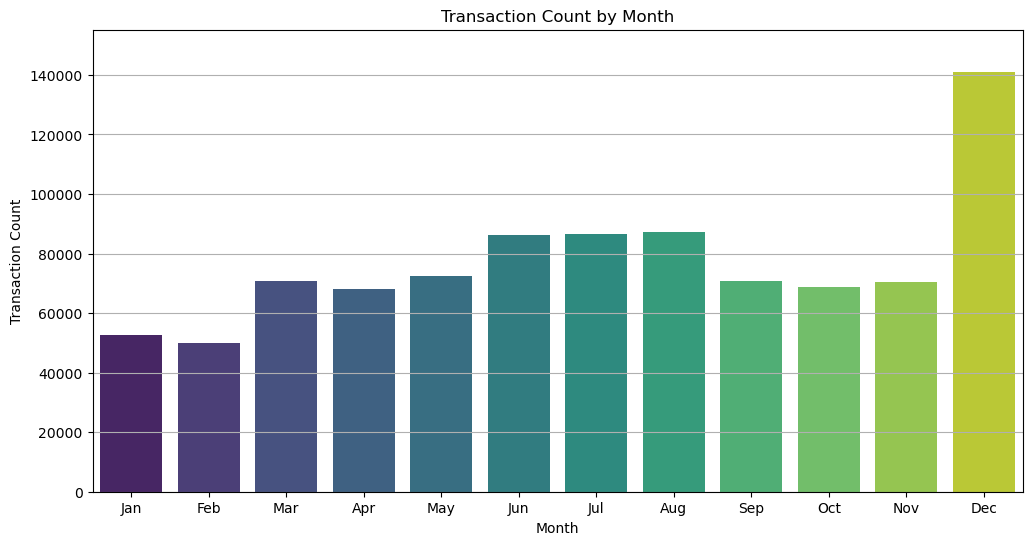

In [32]:
# Monthly trends
monthly_trends = transactions_df.groupby('month').agg({'amt': ['count', 'mean']}).reset_index()
monthly_trends.columns = ['month', 'transaction_count', 'average_amount']
# Plot transaction count by month
plt.figure(figsize = (12, 6))
sns.barplot(data = monthly_trends,
            x = 'month',
            y = 'transaction_count',
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(ticks = range(0, 12), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, monthly_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()


Insights: Transaction count by month shows a significant increase in December, likely due to holiday shopping. The transaction count in June, July, and August is also relatively high compared to other moths, which may indicate summer spending patterns. The transaction count in January and February is relatively low, which may indicate a post-holiday spending slowdown.

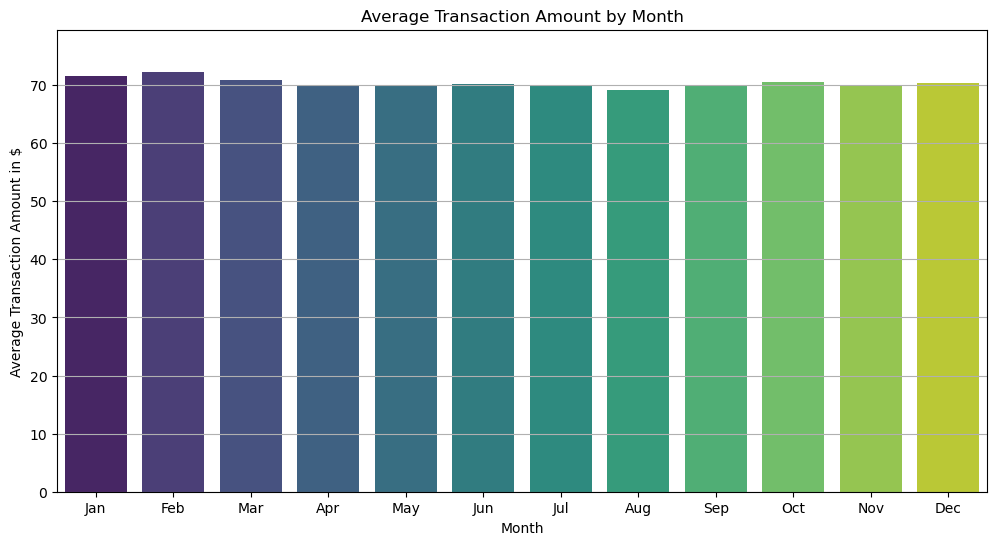

In [33]:
# Plot average transaction amount by month
plt.figure(figsize = (12, 6))
sns.barplot(data = monthly_trends,
            x = 'month',
            y = 'average_amount',
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(ticks = range(0, 12), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, monthly_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()  

Insights: The average transaction amount by month shows a steady state around 70 USD, with a slight increase in January, Frebruary, and March, and a slight decrease in August.

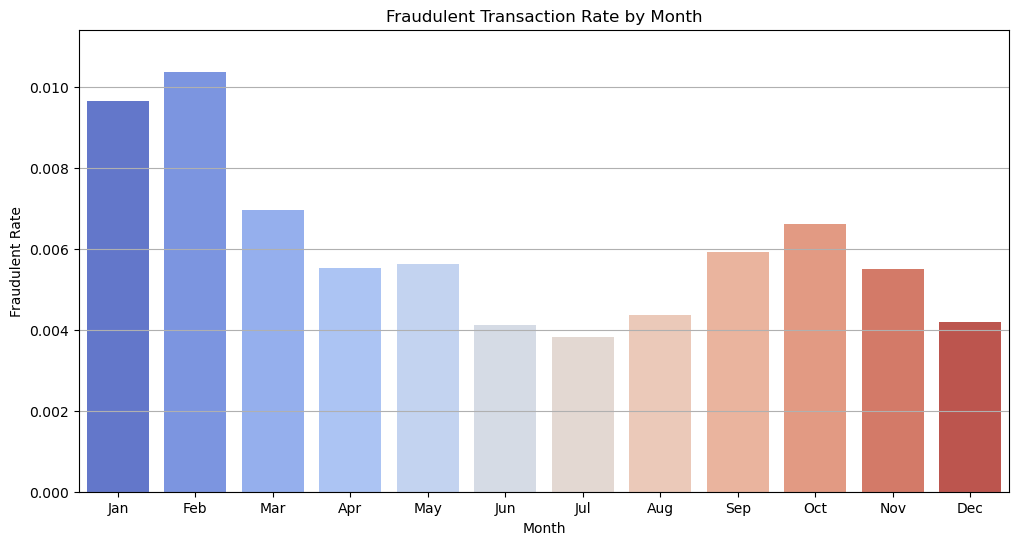

Kruskal-Wallis H-test: Statistics=546.77398, p-value=0.00000
Significant differences in fraudulent rates across different months.
        count      mean       std
month                            
1       52525  0.009634  0.097677
2       49866  0.010368  0.101294
3       70939  0.006964  0.083158
4       68078  0.005523  0.074112
5       72532  0.005625  0.074790
6       86064  0.004113  0.064003
7       86596  0.003822  0.061707
8       87359  0.004373  0.065982
9       70652  0.005916  0.076690
10      68758  0.006603  0.080990
11      70421  0.005510  0.074023
12     141060  0.004197  0.064647


In [34]:
# Investigate fraudulent transaction rate by month
fraudulent_rate_by_month = transactions_df.groupby('month')['is_fraud'].mean().reset_index()
plt.figure(figsize = (12, 6))
sns.barplot(data = fraudulent_rate_by_month,
            x = 'month',
            y = 'is_fraud',
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Month')
plt.xlabel('Month')
plt.ylabel('Fraudulent Rate')
plt.xticks(ticks = range(0, 12), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, fraudulent_rate_by_month['is_fraud'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by month
# Kruskal-Wallis H-test for transaction fraudulent rate by 'month'
# Use transactions_df which contains the 'month' and 'is_fraud' columns
months = sorted(transactions_df['month'].unique())
groups = [transactions_df.loc[transactions_df['month'] == m, 'is_fraud'].values for m in months]

# Run Kruskal-Wallis test across monthly groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different months.")
else:
    print("No significant differences in fraudulent rates across different months.")

# Summary statistics by month
print(transactions_df.groupby('month')['is_fraud'].agg(['count', 'mean', 'std']))

Insights: There are significant differences in fraudulent transaction rates by month, with a significant high in February and a significant low in July. The fraudulent transaction rate shows a high increase in January and February, peaking in February. This suggests that fraudulent activities are more likely to occur during the first two months of the year, highlighting the need for increased monitoring and security measures during these times. The rate of fraudulent transactions is significantly lower in July, indicating that most transactions during this month are legitimate.


2. Where: Merchant and Geographic analysis

2. 1 Merchant analysis: Analyze transaction patterns across different merchants to identify spending behavior.

In [35]:
# Merchant category trends
merchant_category_trends = transactions_df.groupby('category').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
merchant_category_trends.columns = ['category', 'transaction_count', 'average_amount', 'fraudulent_rate']

In [36]:
merchant_category_trends

category  transaction_count  average_amount  fraudulent_rate
0    entertainment              67097       64.139503         0.002429
1      food_dining              65461       51.181443         0.001589
2    gas_transport              93859       63.425519         0.004677
3      grocery_net              32320       53.808203         0.002908
4      grocery_pos              87893      116.828782         0.013676
5   health_fitness              61115       54.043142         0.001571
6             home              87849       58.183919         0.001468
7        kids_pets              80644       57.550575         0.002133
8         misc_net              45040       80.376026         0.013965
9         misc_pos              56879       62.559165         0.002989
10   personal_care              64923       47.914108         0.002341
11    shopping_net              69554       88.571446         0.017267
12    shopping_pos              83205       79.216328         0.007007
13          travel              29011      112.861098         0.002964

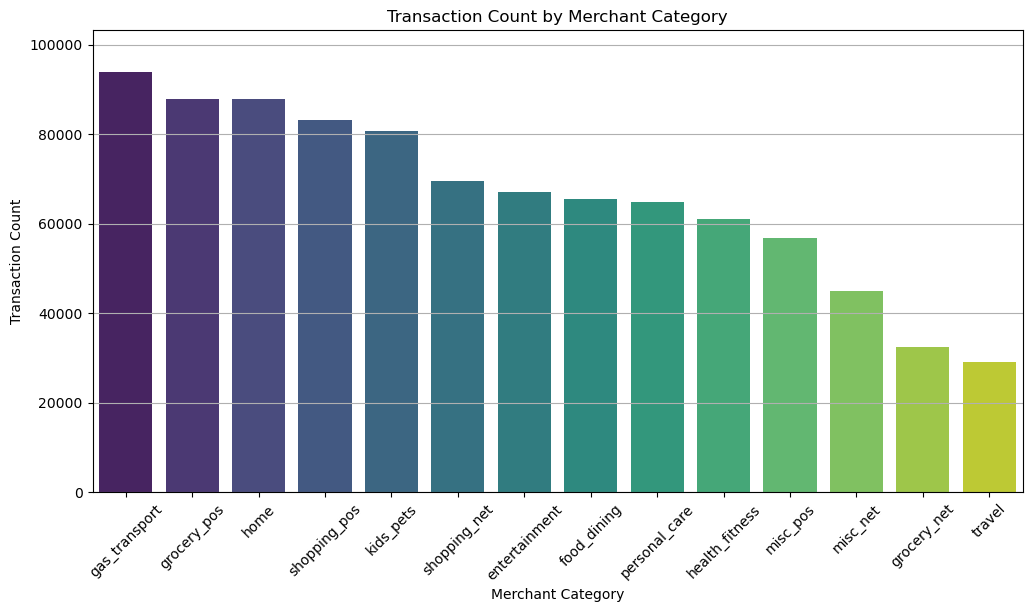

In [37]:
# Plot transaction count by merchant category
plt.figure(figsize = (12, 6))
sns.barplot(data = merchant_category_trends,
            x= 'category',
            y = 'transaction_count',
            order = merchant_category_trends.sort_values(by = ['transaction_count'], ascending = False)['category'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation = 45)
plt.ylim(0, merchant_category_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Insights: Transaction count by merchant shows that the top 5 merchants are gas transportation, grocery pos, home, shopping pos, and kids pets. This suggests that customers tend to spend more on gas tranpottation, grocery, home, shopping, and kids/pets. The lowest transaction count is in the traval, grocery net.

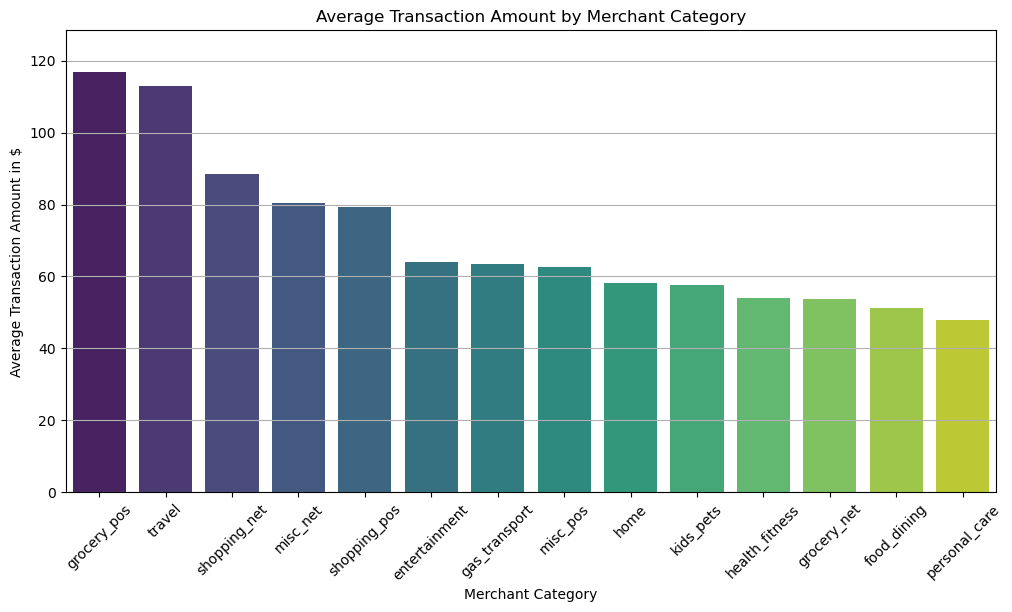

In [38]:
# Plot average transaction amount by merchant category
plt.figure(figsize = (12, 6))
sns.barplot(data = merchant_category_trends,
            x= 'category',
            y = 'average_amount',
            order = merchant_category_trends.sort_values(by = ['average_amount'], ascending = False)['category'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(rotation = 45)
plt.ylim(0, merchant_category_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Insights: The average transaction amount by merchant shows that the top 5 merchants are grocery pos, travel, shopping net, misc net, and shopping pos. This suggests that customers tend to spend more on grocery pos in transaction count over 120,000 transactions with an average amount near 120 USD each. The travel merchant with lowest transaction count has an average amount over 110 USD, followed by shopping net, misc net, and shopping pos. The lowest average transaction amount is in personal care,followed by food dining, grocery net, health fitness, and kids pets.

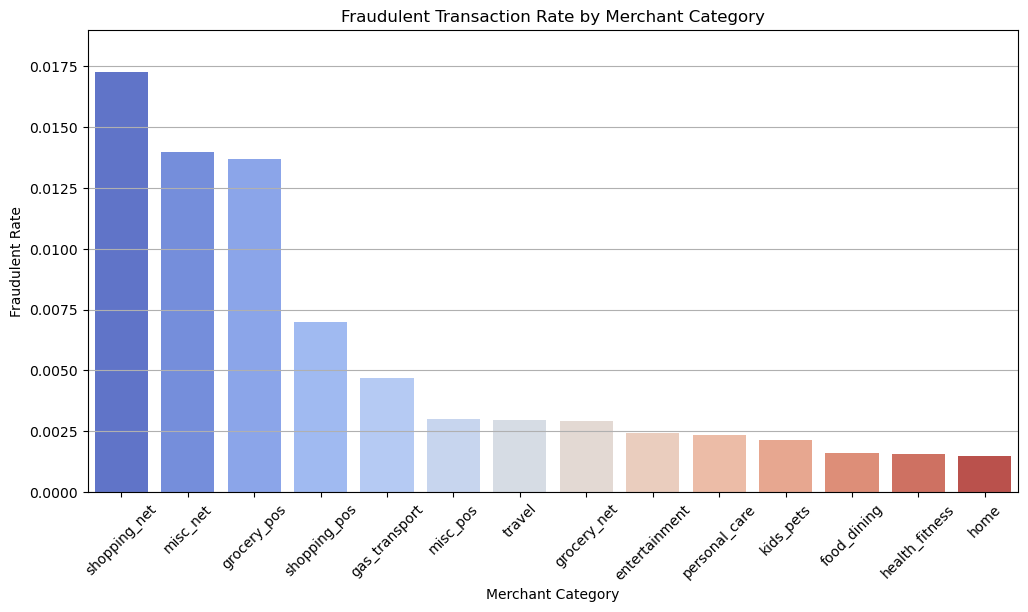

Kruskal-Wallis H-test: Statistics=4507.34586, p-value=0.00000
Significant differences in fraudulent rates across different merchant categories.
                count      mean       std
category                                 
entertainment   67097  0.002429  0.049229
food_dining     65461  0.001589  0.039828
gas_transport   93859  0.004677  0.068231
grocery_net     32320  0.002908  0.053852
grocery_pos     87893  0.013676  0.116141
health_fitness  61115  0.001571  0.039603
home            87849  0.001468  0.038292
kids_pets       80644  0.002133  0.046134
misc_net        45040  0.013965  0.117348
misc_pos        56879  0.002989  0.054589
personal_care   64923  0.002341  0.048330
shopping_net    69554  0.017267  0.130266
shopping_pos    83205  0.007007  0.083413
travel          29011  0.002964  0.054366


In [39]:
# Plot investigate fraudulent transaction rate by merchant category
plt.figure(figsize = (12, 6))
sns.barplot(data = merchant_category_trends,
            x= 'category',
            y = 'fraudulent_rate',
            order = merchant_category_trends.sort_values(by = ['fraudulent_rate'], ascending = False)['category'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraudulent Rate')
plt.xticks(rotation = 45)
plt.ylim(0, merchant_category_trends['fraudulent_rate'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by merchant category
# Kruskal-Wallis H-test for transaction fraudulent rate by 'merchant_category'
# Use transactions_df which contains the 'category' and 'is_fraud' columns
merchant_categories = sorted(transactions_df['category'].unique())
groups = [transactions_df.loc[transactions_df['category'] == mc, 'is_fraud'].values for mc in merchant_categories]

# Run Kruskal-Wallis test across monthly groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different merchant categories.")
else:
    print("No significant differences in fraudulent rates across different merchant categories.")

# Summary statistics by merchant category
print(transactions_df.groupby('category')['is_fraud'].agg(['count', 'mean', 'std']))

Insights: There are significant differences in fraudulent transaction rates by merchant category. The top 5 merchants with the highest fraudulent transaction rates are shopping net (1.73%), misc net (1.40%), grocery pos (1.37%), shopping pos (0.70%), and gas transportation (0.47%). Conversely, the lowest fraudulent transaction rate is observed in health fitness (0.16%), followed by home (0.15%), food dining (0.16%), kids pets (0.13%), and personal care (0.12%).

2. 2 Spending by city: Analyze transaction patterns across different cities to identify geographic spending behavior.

In [40]:
# Spending by city trends
city_trends = transactions_df.groupby('city').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
city_trends.columns = ['city', 'transaction_count', 'average_amount', 'fraudulent_rate']
city_trends

city  transaction_count  average_amount  \
0                      Achille                371       52.456685   
1                      Acworth               1501       98.407388   
2                        Adams                367       56.591008   
3                        Afton               1455       65.555622   
4                        Akron                356       85.262921   
..                         ...                ...             ...   
871                Woods Cross                381       96.764987   
872                  Woodville               1528       49.416342   
873  Yellowstone National Park                367       70.205640   
874                    Zaleski               1061       92.051216   
875                    Zavalla               1129       65.715660   

     fraudulent_rate  
0           0.000000  
1           0.008661  
2           0.000000  
3           0.006186  
4           0.000000  
..               ...  
871         0.000000  
872         0.000000  
873         0.032698  
874         0.000000  
875         0.000000  

[876 rows x 4 columns]

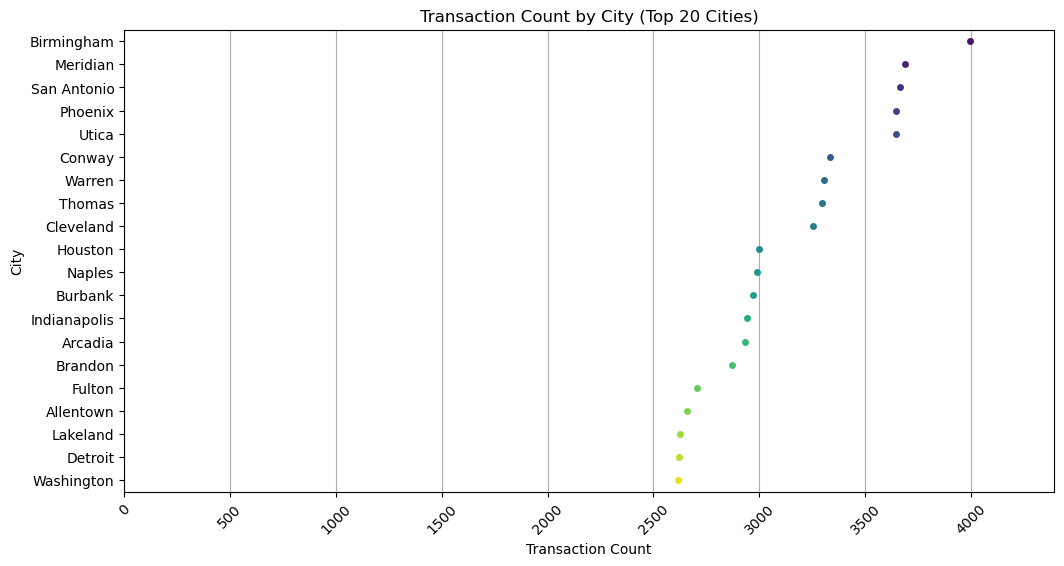

In [41]:
# Strip plot transaction count by top 20 cities
top_city_trends = city_trends.sort_values(by = ['transaction_count'], ascending = False).head(20)
plt.figure(figsize = (12, 6))
sns.stripplot(data = top_city_trends,
              x = 'transaction_count',
              y = 'city',
              order = top_city_trends.sort_values(by = ['transaction_count'], ascending = False)['city'],
              palette = 'viridis',
              jitter = True)
plt.title('Transaction Count by City (Top 20 Cities)')
plt.xlabel('Transaction Count')
plt.ylabel('City')
plt.xticks(rotation = 45)
plt.xlim(0, top_city_trends['transaction_count'].max() * 1.1)
plt.grid(axis='x')
plt.show()

The top five cities of highest transaction count are in Birmingham, followed by Meridian, San Antonio, Phoenix, Utica. The top cities with high count of transactions indicate that these cities have a high volume of credit card transactions, which may be due to a larger population or more businesses accepting credit cards. Start with Washington more than 2,500 transactions and end with Birmingham near 4,000 transactions in 2019.

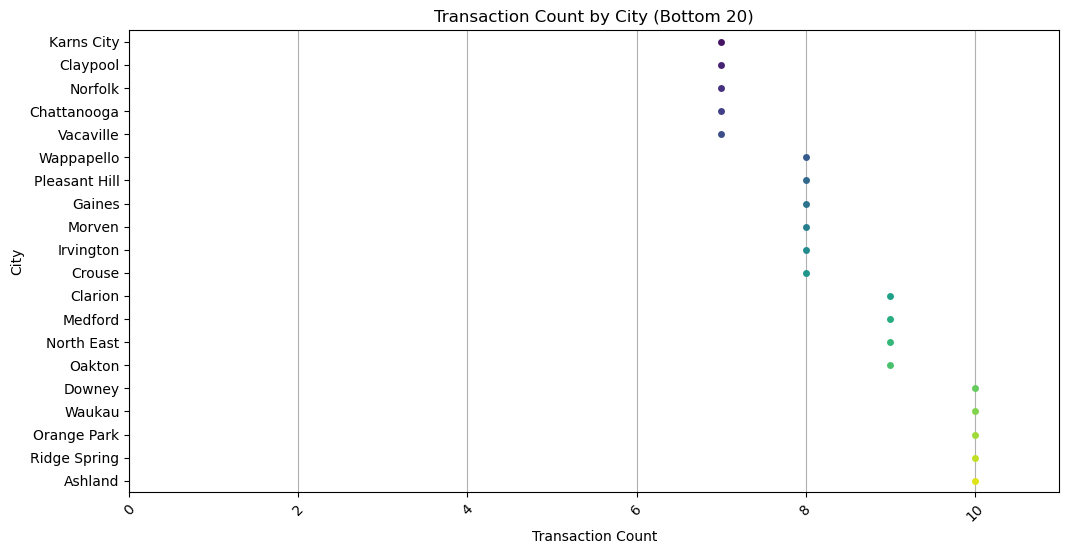

In [42]:
# 20 cities with lowest transaction count
bottom_city_trends = city_trends.sort_values(by = ['transaction_count'], ascending = True).head(20)
plt.figure(figsize = (12, 6))
sns.stripplot(data = bottom_city_trends,
                x = 'transaction_count',
                y = 'city',
                order = bottom_city_trends.sort_values(by = ['transaction_count'], ascending = True)['city'],
                palette = 'viridis',
                jitter = True)
plt.title('Transaction Count by City (Bottom 20)')
plt.xlabel('Transaction Count')
plt.ylabel('City')
plt.xticks(rotation = 45)
plt.xlim(0, bottom_city_trends['transaction_count'].max() * 1.1)
plt.grid(axis='x')
plt.show()


Bottom five cities with lowest transaction count are in Norfolk, Clayton, Vacaville, Karns City, and Chattanooga. The bottom cities with low count of transactions indicate that these cities have a low volume of credit card transactions, which may be due to a smaller population or fewer businesses accepting credit cards. Those cities have 7 to 10 transactions in 2019.

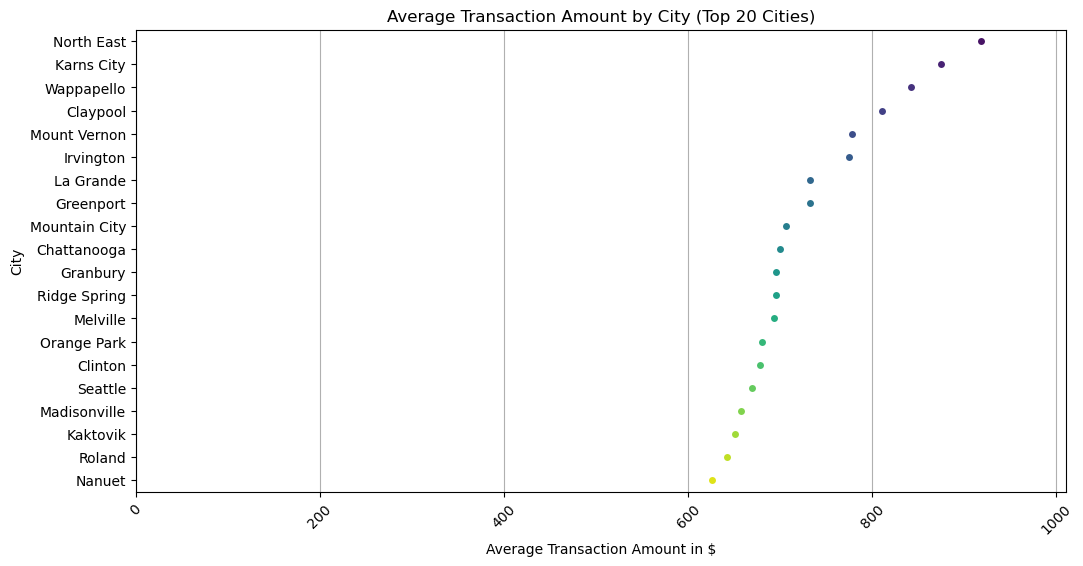

In [43]:
# Top 20 cities by average transaction amount
top_city_avg_amount = city_trends.sort_values(by = ['average_amount'], ascending = False).head(20)
plt.figure(figsize = (12, 6))
sns.stripplot(data = top_city_avg_amount,
              x = 'average_amount',
              y = 'city',
              order = top_city_avg_amount.sort_values(by = ['average_amount'], ascending = False)['city'],
              palette = 'viridis',
              jitter = True)
plt.title('Average Transaction Amount by City (Top 20 Cities)')
plt.xlabel('Average Transaction Amount in $')
plt.ylabel('City')
plt.xticks(rotation = 45)
plt.xlim(0, top_city_avg_amount['average_amount'].max() * 1.1)
plt.grid(axis='x')
plt.show()

Highest average transaction amount by ciy is in bottom 20 cities with lowest transaction count such as North East, Karns City, Wappapello, Claypool, Mount Vernon. Low transaction count but high average transaction amount indicates that these cities have a small number of transactions but the transactions are relatively large in amount.

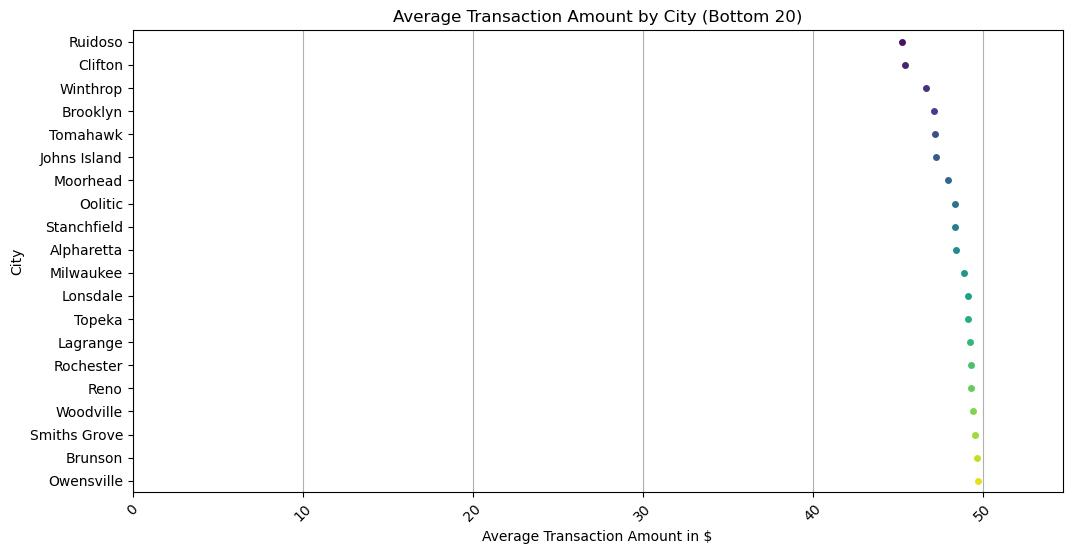

In [44]:
# Bottom 20 cities by average transaction amount
bottom_city_avg_amount = city_trends.sort_values(by = ['average_amount'], ascending = True).head(20)
plt.figure(figsize = (12, 6))
sns.stripplot(data = bottom_city_avg_amount,
              x = 'average_amount',
              y = 'city',
              order = bottom_city_avg_amount.sort_values(by = ['average_amount'], ascending = True)['city'],
              palette = 'viridis',
              jitter = True)
plt.title('Average Transaction Amount by City (Bottom 20)')
plt.xlabel('Average Transaction Amount in $')
plt.ylabel('City')
plt.xticks(rotation = 45)
plt.xlim(0, bottom_city_avg_amount['average_amount'].max() * 1.1)
plt.grid(axis='x')
plt.show()

Bottom 5 cities with lowest average transaction amount are in Ruidoso, Clifton, Winthrop, Brooklyn, and Tomahawk. Bottom cities with low average transaction amount are lower than 50 USD, which indicates that these cities have a small amount of transactions and the transactions are relatively small in amount.

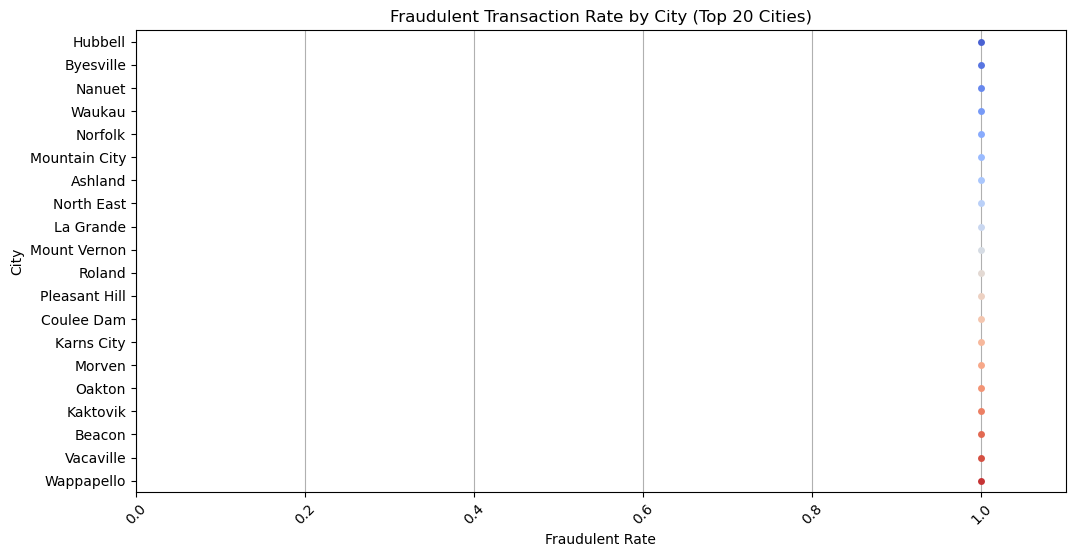

Kruskal-Wallis H-test: Statistics=79405.21859, p-value=0.00000
Significant differences in fraudulent rates across different cities.
               count  mean  std
city                           
Hubbell           19   1.0  0.0
Byesville         12   1.0  0.0
Vacaville          7   1.0  0.0
Beacon            11   1.0  0.0
Kaktovik          12   1.0  0.0
...              ...   ...  ...
Keisterville    1489   0.0  0.0
Karnack         1076   0.0  0.0
Jordan Valley    369   0.0  0.0
Jay              360   0.0  0.0
Zavalla         1129   0.0  0.0

[876 rows x 3 columns]


In [45]:
# Top 20 cities by fraudulent transaction rate
top_city_fraudulent_rate = city_trends.sort_values(by = ['fraudulent_rate'], ascending = False).head(20)
plt.figure(figsize = (12, 6))
sns.stripplot(data = top_city_fraudulent_rate,
              x = 'fraudulent_rate',
              y = 'city',
              order = top_city_fraudulent_rate.sort_values(by = ['fraudulent_rate'], ascending = False)['city'],
              palette = 'coolwarm',
              jitter = True)
plt.title('Fraudulent Transaction Rate by City (Top 20 Cities)')
plt.xlabel('Fraudulent Rate')
plt.ylabel('City')
plt.xticks(rotation = 45)
plt.xlim(0, top_city_fraudulent_rate['fraudulent_rate'].max() * 1.1)
plt.grid(axis='x')
plt.show()
# Statistical test to check if fraudulent rates differ by city
# Kruskal-Wallis H-test for transaction fraudulent rate by 'city'
# Use transactions_df which contains the 'city' and 'is_fraud' columns
cities = sorted(transactions_df['city'].unique())
groups = [transactions_df.loc[transactions_df['city'] == c, 'is_fraud'].values for c in cities]

# Run Kruskal-Wallis test across monthly groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different cities.")
else:
    print("No significant differences in fraudulent rates across different cities.")

# Summary statistics by city sorted by city name descending mean
print(transactions_df.groupby('city')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))

Strong evidence to reject the null hypothesis. There are significant differences in fraudulent rates across different cities.

Many cities with low transaction count often exhibit higher fraudulent rates, such as Norfolk, Vacaville, Karns City, Chattanooga, and Clayton. This suggests that fraudulent activities are more likely to occur in cities with lower transaction volumes, which highlights the need for increased monitoring and security measures in these areas. Conversely, cities with high transaction counts tend to have lower fraudulent rates, indicating that most transactions in these cities are legitimate.

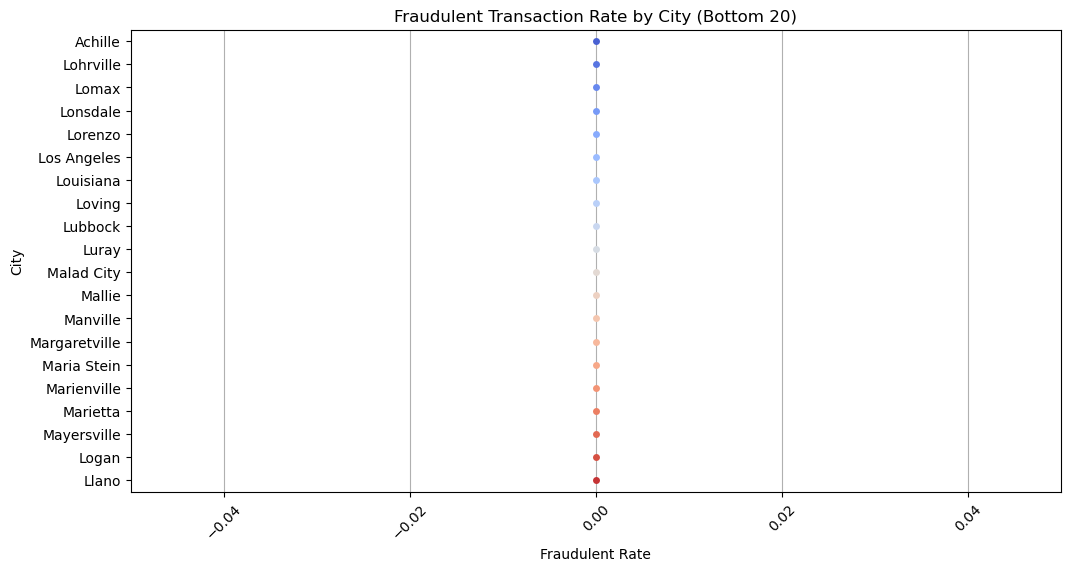

In [46]:
# Bottom 20 cities by fraudulent transaction rate
bottom_city_fraudulent_rate = city_trends.sort_values(by = ['fraudulent_rate'], ascending = True).head(20)
plt.figure(figsize = (12, 6))
sns.stripplot(data = bottom_city_fraudulent_rate,
              x = 'fraudulent_rate',
              y = 'city',
              order = bottom_city_fraudulent_rate.sort_values(by = ['fraudulent_rate'], ascending = True)['city'],
              palette = 'coolwarm',
              jitter = True)
plt.title('Fraudulent Transaction Rate by City (Bottom 20)')
plt.xlabel('Fraudulent Rate')
plt.ylabel('City')
plt.xticks(rotation = 45)
plt.xlim(0, bottom_city_fraudulent_rate['fraudulent_rate'].max() * 1.1)
plt.grid(axis='x')
plt.show()

These cities with non fraudulent transaction rate. Some cities with low average transaction amount have zero frandulent transaction rate, which indicates that these cities have a transaction realtively small in amount and no fraudulent activities.

Strong evidence to reject the null hypothesis. There are significant differences in fraudulent rates across different cities. Some cities have 100% fraudulent transaction rate such as Hubbell, Byesville, Vacaville, Beacon, and Kaktovik, while many cities have 0% fraudulent transaction rate. This indicates that fraudulent activities are more likely to occur in certain cities, which highlights the need for increased monitoring and security measures in those areas.

2. 3 Spending by state: Analyze transaction patterns across different states to identify geographic spending behavior.

In [47]:
# State trends
state_trends = transactions_df.groupby('state').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
state_trends.columns = ['state', 'transaction_count', 'average_amount', 'fraudulent_rate']
state_trends

state  transaction_count  average_amount  fraudulent_rate
0     AK               1520       70.989289         0.017763
1     AL              29223       65.479978         0.005201
2     AR              22056       75.906092         0.005441
3     AZ               7685       74.662221         0.003904
4     CA              40378       73.347154         0.005300
5     CO               9853       78.171152         0.008018
6     CT               5512       66.499918         0.002903
7     DC               2617       75.141230         0.008024
8     DE                  9      514.493333         1.000000
9     FL              30648       74.099051         0.007537
10    GA              18568       69.868885         0.004578
11    HI               1812       57.283775         0.003863
12    IA              19115       65.441663         0.004342
13    ID               3969       71.588231         0.002771
14    IL              30862       69.267682         0.006416
15    IN              19629       68.214628         0.003617
16    KS              16416       67.527886         0.004386
17    KY              20254       66.723841         0.006122
18    LA              14964       73.781725         0.003208
19    MA               8804       63.657398         0.005566
20    MD              18810       64.625303         0.005954
21    ME              11861       63.363216         0.006998
22    MI              32875       71.696267         0.005141
23    MN              22511       68.022772         0.005819
24    MO              27466       69.229242         0.006044
25    MS              15039       66.223236         0.003790
26    MT               8327       70.519506         0.003843
27    NC              21745       76.383800         0.005013
28    ND              10690       66.318211         0.004210
29    NE              17332       68.398015         0.007270
30    NH               5888       74.206126         0.008322
31    NJ              17661       65.873110         0.003624
32    NM              11784       59.903977         0.003819
33    NV               3984       56.879528         0.009287
34    NY              59498       72.333746         0.007631
35    OH              33014       73.779888         0.007300
36    OK              18938       66.159437         0.005439
37    OR              13276       70.125736         0.006026
38    PA              56843       72.291204         0.005805
39    RI                390       98.319513         0.038462
40    SC              20718       64.188988         0.005213
41    SD               8667       69.725759         0.004038
42    TN              12421       75.236885         0.008373
43    TX              67676       71.712025         0.005275
44    UT               7696       63.149722         0.003768
45    VA              20904       70.171912         0.005454
46    VT               8386       79.803444         0.001550
47    WA              13439       73.646067         0.005134
48    WI              20908       69.003094         0.005548
49    WV              18380       70.162781         0.004625
50    WY              13829       75.370515         0.006870

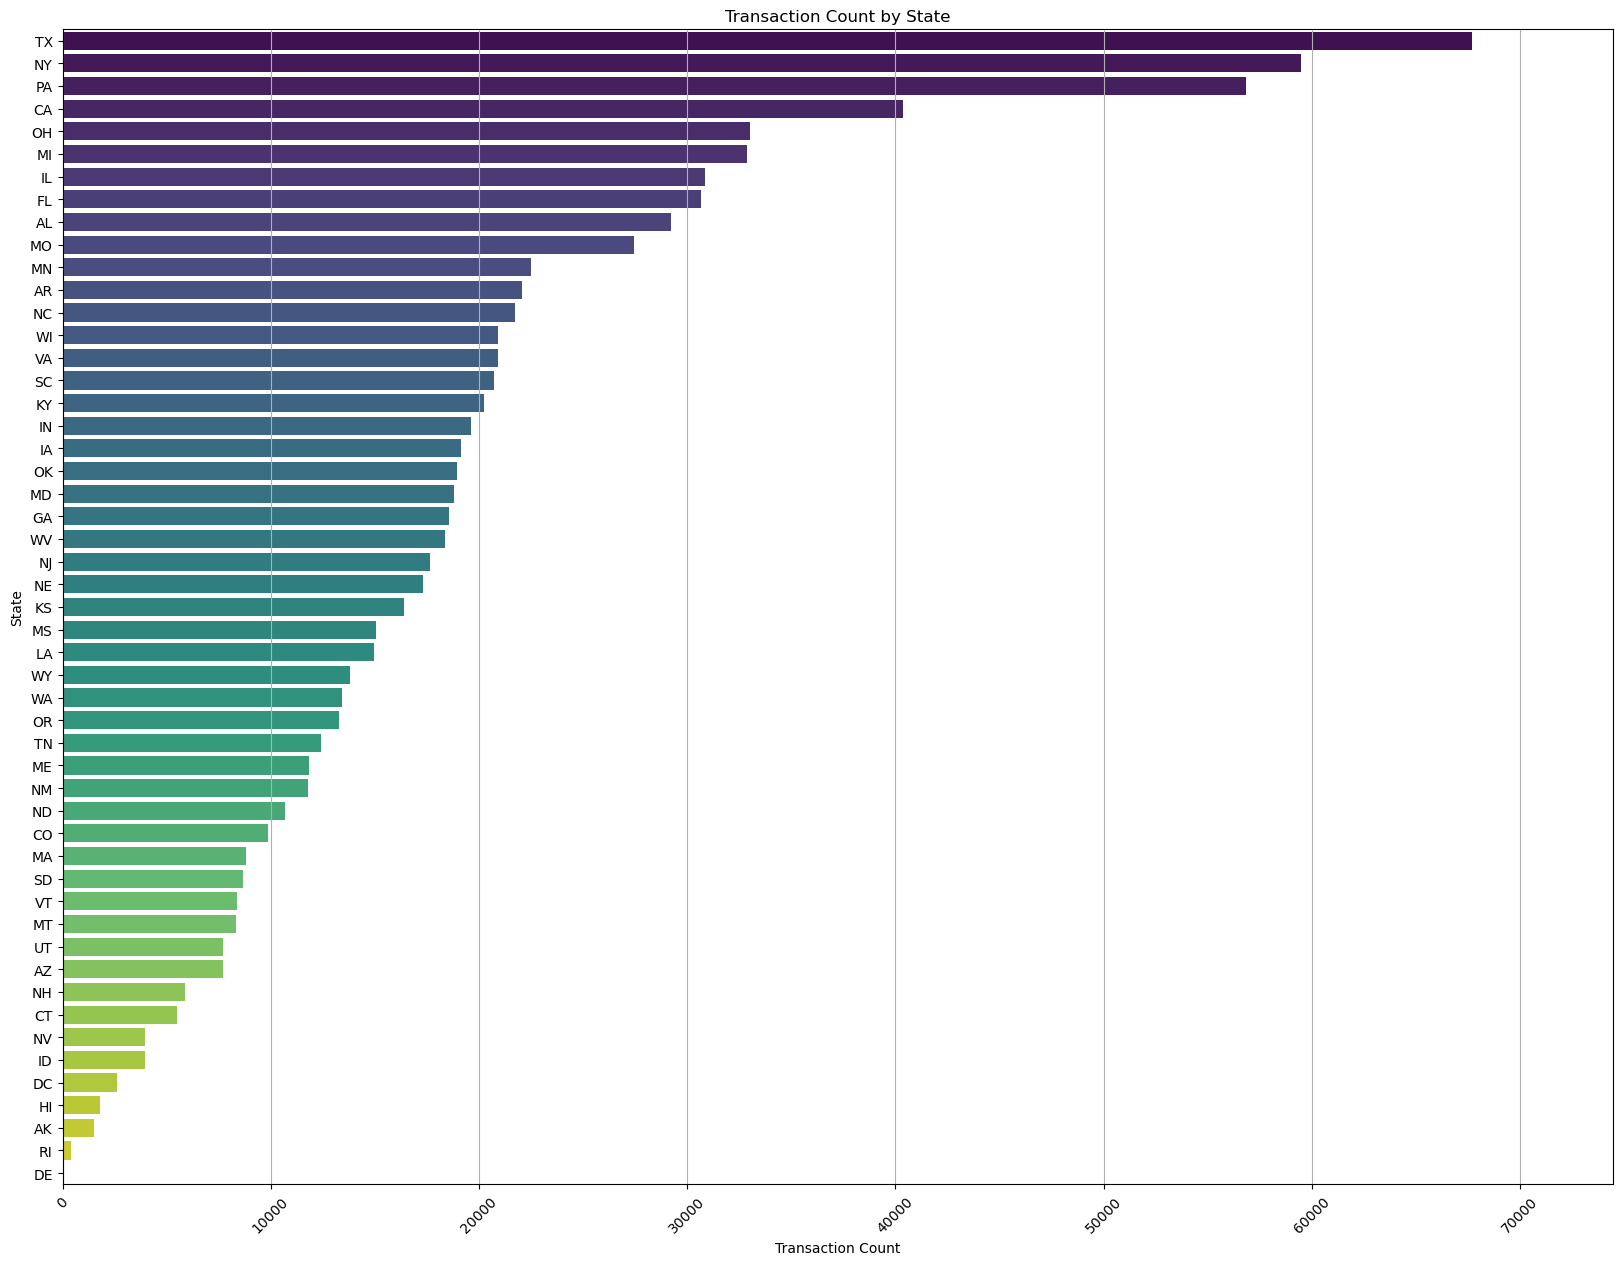

In [48]:
# Plot transaction count by state
plt.figure(figsize = (20, 15))
sns.barplot(data = state_trends,
            x = 'transaction_count',
            y = 'state',
            order = state_trends.sort_values(by = ['transaction_count'], ascending = False)['state'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by State')
plt.xlabel('Transaction Count')
plt.ylabel('State')
plt.xticks(rotation = 45)
plt.xlim(0, state_trends['transaction_count'].max() * 1.1)
plt.grid(axis='x')
plt.show()

Top 10 states with highest transaction count are TX, NY, PA, CA, OH, MI, IL, FL, AL, and MO. The highest transaction count is in TX with over 65,000 transactions, followed by NY with near 60,000 transactions, and PA more than 55,000 transactions. The lowest transaction count is in DE only 9 transactions, followed by RI with 390 transactions, and AK with 1,520 transactions.

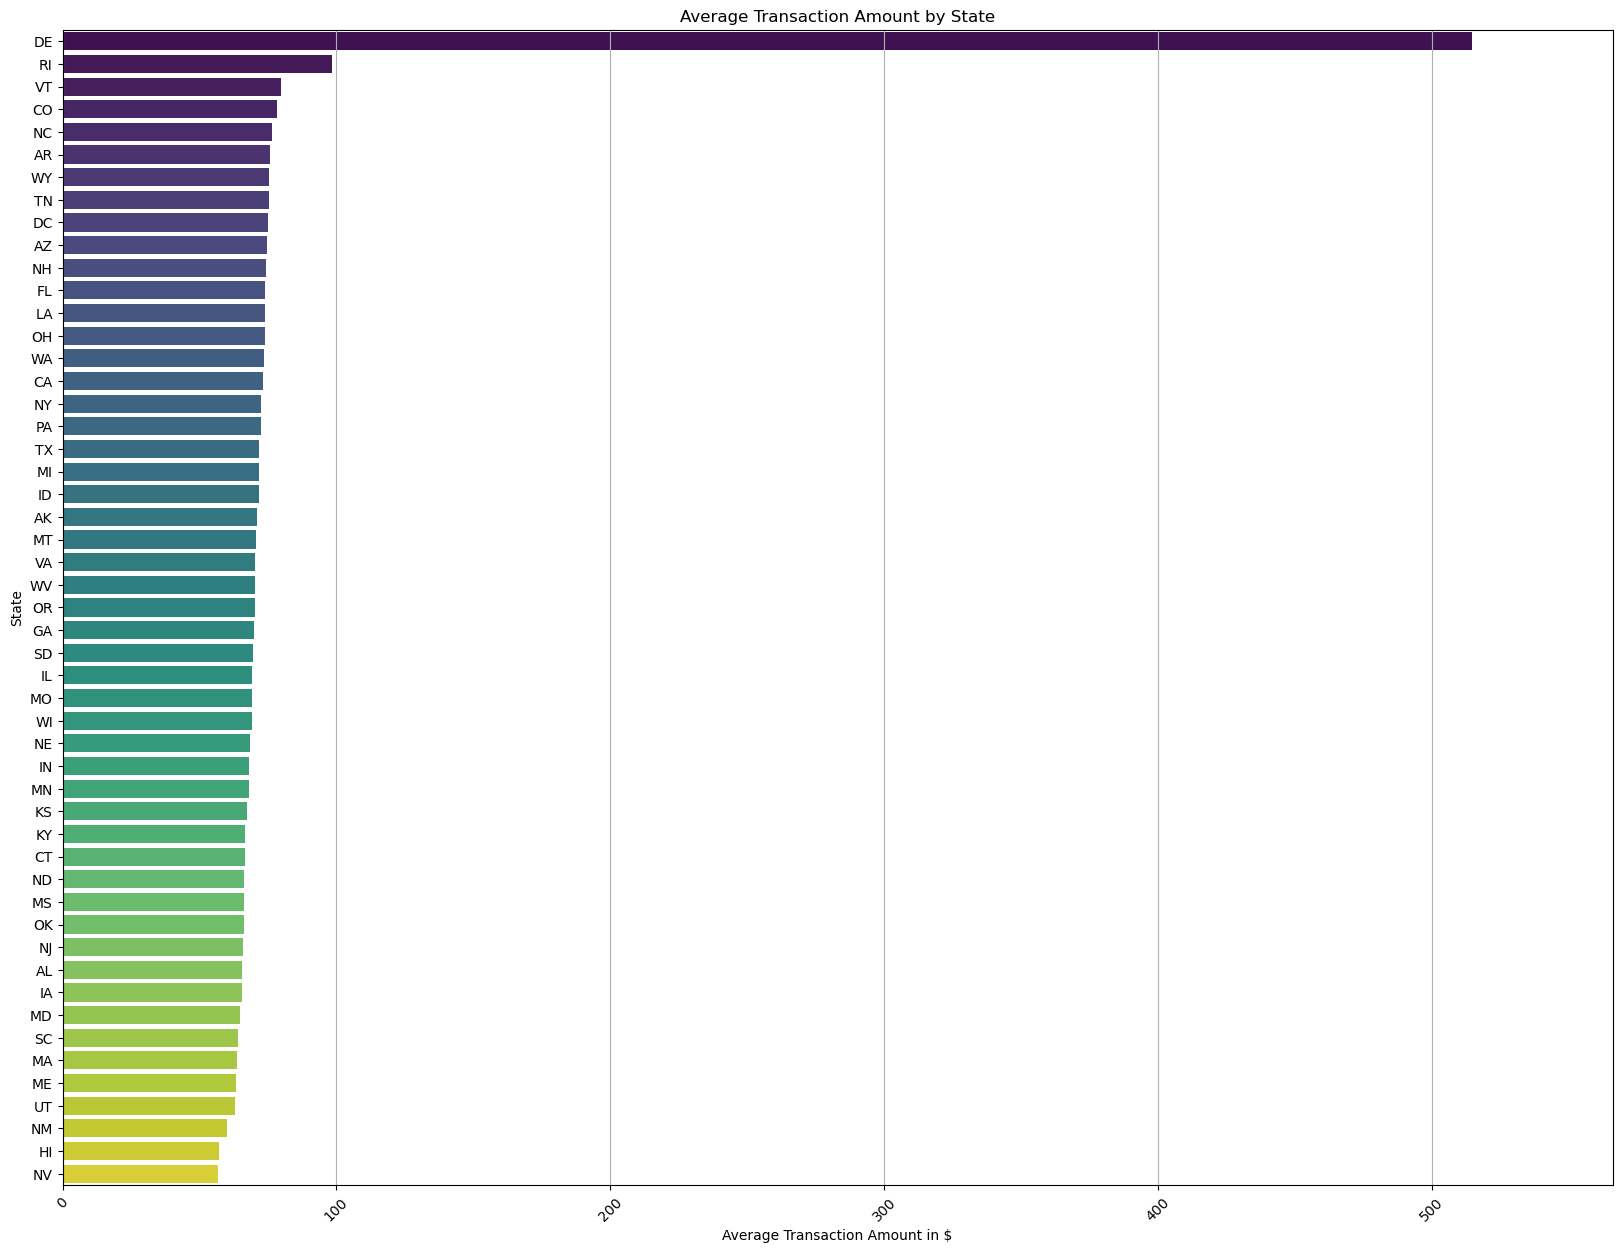

In [49]:
# Plot average transaction amount by merchant category
plt.figure(figsize = (20, 15))
sns.barplot(data = state_trends,
            x = 'average_amount',
            y = 'state',
            order = state_trends.sort_values(by = ['average_amount'], ascending = False)['state'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by State')
plt.xlabel('Average Transaction Amount in $')
plt.ylabel('State')
plt.xticks(rotation = 45)
plt.xlim(0, state_trends['average_amount'].max() * 1.1)
plt.grid(axis='x')
plt.show()

DE has the lowest transaction count with only 9 transactions but the highest average transaction amount over 500 USD, followed by RI with 390 transactions and an average amount near 100 USD, all other states have an average transaction amount around 70 USD.

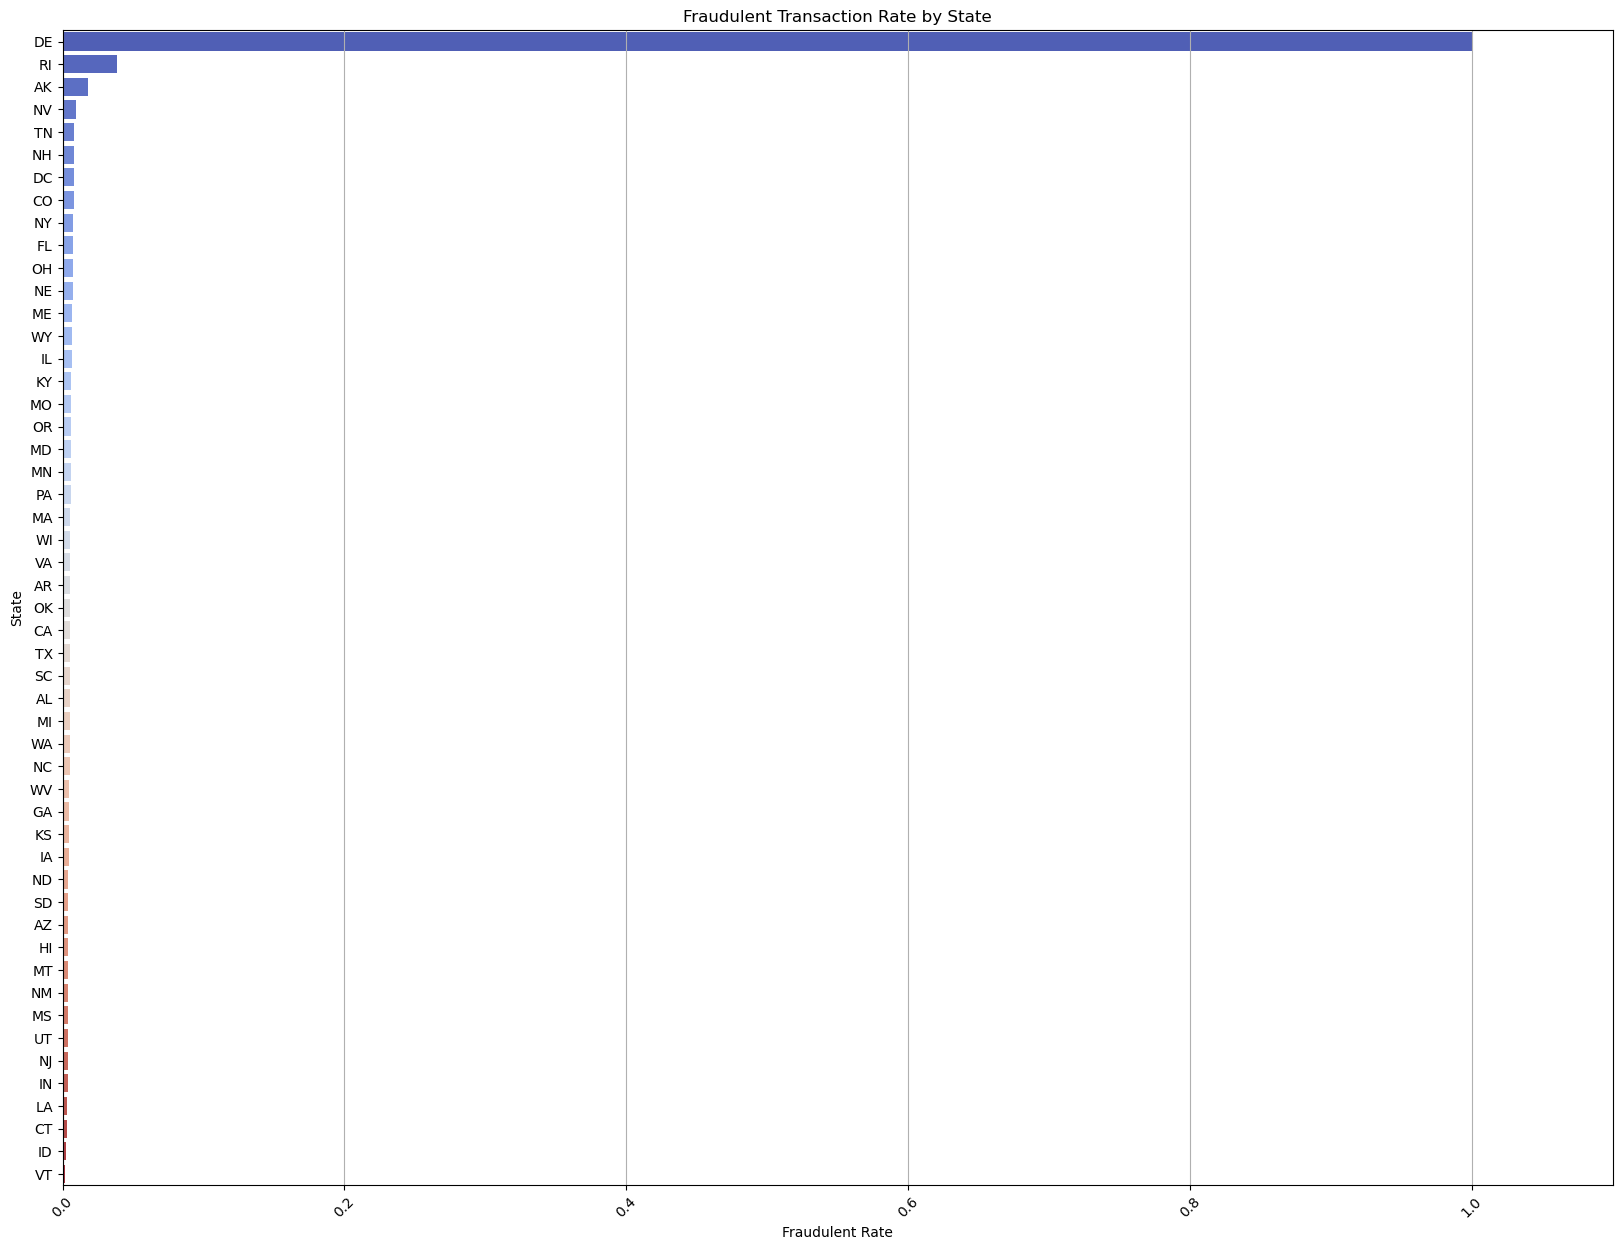

Kruskal-Wallis H-test: Statistics=1991.47007, p-value=0.00000
Significant differences in fraudulent rates across different states.
       count      mean       std
state                           
DE         9  1.000000  0.000000
RI       390  0.038462  0.192555
AK      1520  0.017763  0.132133
NV      3984  0.009287  0.095933
TN     12421  0.008373  0.091123
NH      5888  0.008322  0.090852
DC      2617  0.008024  0.089236
CO      9853  0.008018  0.089187
NY     59498  0.007631  0.087020
FL     30648  0.007537  0.086491
OH     33014  0.007300  0.085129
NE     17332  0.007270  0.084955
ME     11861  0.006998  0.083363
WY     13829  0.006870  0.082601
IL     30862  0.006416  0.079842
KY     20254  0.006122  0.078007
MO     27466  0.006044  0.077508
OR     13276  0.006026  0.077395
MD     18810  0.005954  0.076936
MN     22511  0.005819  0.076064
PA     56843  0.005805  0.075973
MA      8804  0.005566  0.074400
WI     20908  0.005548  0.074281
VA     20904  0.005454  0.073648
AR     2205

In [50]:
# Plot investigate fraudulent transaction rate by state
plt.figure(figsize = (20, 15))
sns.barplot(data = state_trends,
            x = 'fraudulent_rate',
            y = 'state',
            order = state_trends.sort_values(by = ['fraudulent_rate'], ascending = False)['state'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by State')
plt.xlabel('Fraudulent Rate')
plt.ylabel('State')
plt.xticks(rotation = 45)
plt.xlim(0, state_trends['fraudulent_rate'].max() * 1.1)
plt.grid(axis='x')
plt.show()
# Statistical test to check if fraudulent rates differ by state
# Kruskal-Wallis H-test for transaction fraudulent rate by 'state'
# Use transactions_df which contains the 'state' and 'is_fraud' columns
states = sorted(transactions_df['state'].unique())
groups = [transactions_df.loc[transactions_df['state'] == c, 'is_fraud'].values for c in states]

# Run Kruskal-Wallis test across  groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different states.")
else:
    print("No significant differences in fraudulent rates across different states.")

# Summary statistics by state, sorted by state name descending mean
print(transactions_df.groupby('state')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))

There are significant differences in fraudulent rates across different states. Strong evidence to reject the null hypothesis. Some states have 100% fraudulent transaction rate such as DE, while many states have low fraudulent transaction rate. This indicates that fraudulent activities are more likely to occur in certain states, which highlights the need for increased monitoring and security measures in those areas.

The highest average transaction amount by state is in DE with over 500 USD with only 9 transactions, and DE also has the highest fraudulent transaction rate with 100% of transactions being fraudulent. The top 3 states with highest fraudulent transaction rate are DE, RI, and AK, which states have a low transaction count but high average transaction amount. The states with low transaction count but high average transaction amount have a high fraudulent transaction rate, which indicates that these states have not alot of transactions but the transactions are relatively large in amount.

2. 4 Spending by latitude and longitude: Analyze transaction patterns across different geographic coordinates to identify spending behavior.

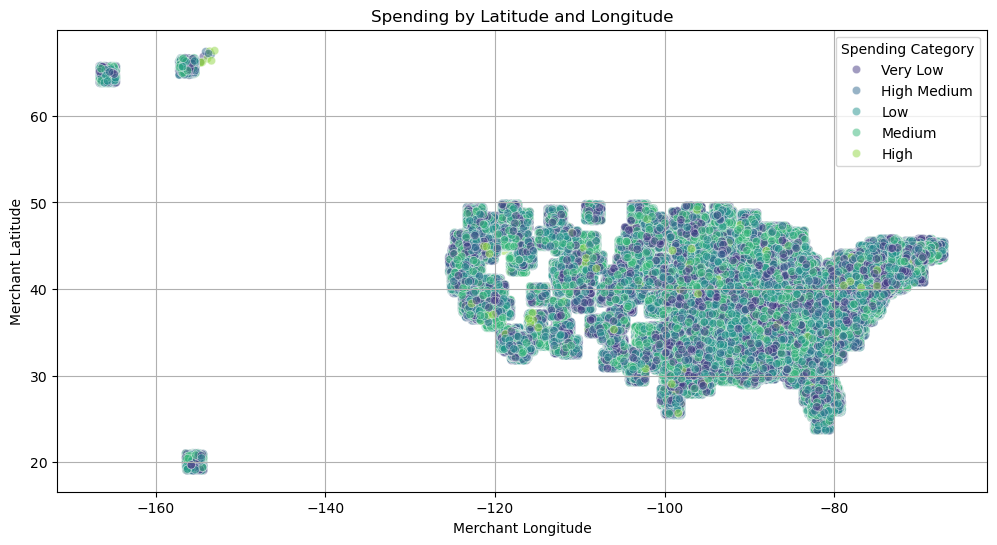

In [51]:
# Spending by latitude and longitude
plt.figure(figsize = (12, 6))
sns.scatterplot(data = transactions_df,
                x = 'merch_long',
                y = 'merch_lat',
                hue = 'spending_category',
                alpha = 0.5,
                palette = 'viridis')
plt.title('Spending by Latitude and Longitude')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title = 'Spending Category')
plt.grid()
plt.show()


In the scatter plot of latitude and longitude, we can see that most transactions are concentrated in the Northeastern and Southeastern regions of the United States, with a few outliers in the Western region. The most transactions are medium-sized and low amounts money spent.

Base on the scatter plot, we can see that most fraudulent transactions are concentrated in Centralwest and Southwest regions of the United States, with a few outliers in the Northeastern and Alaska regions.
The fraudulent transactions are mostly big amounts money spent, which indicates that these transactions are more likely to be fraudulent.

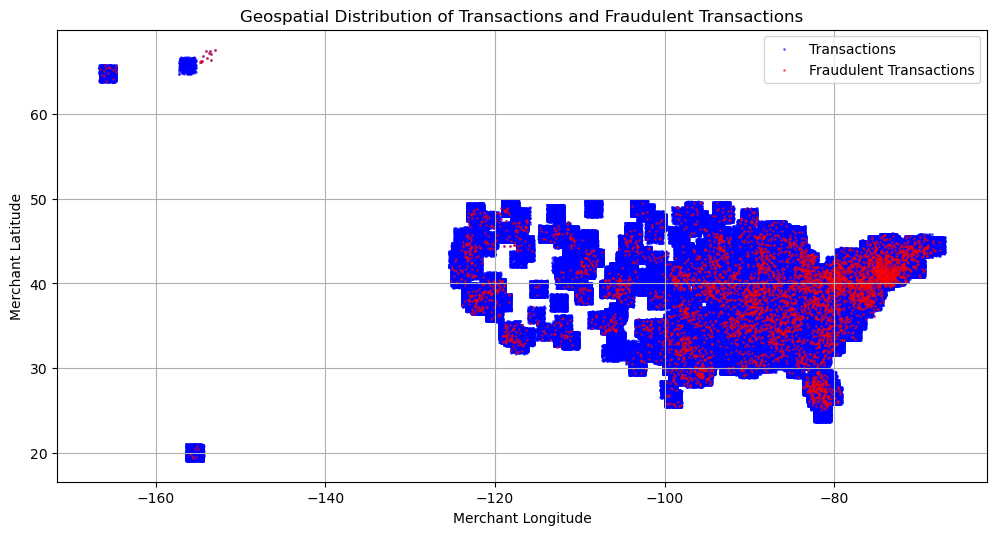

In [52]:
# Geospatial distribution of transactions and fraudulent transactions
import geopandas as gpd
# Create a GeoDataFrame for latitude and longitude
gdf = gpd.GeoDataFrame(transactions_df, geometry=gpd.points_from_xy(transactions_df['merch_long'], transactions_df['merch_lat']))
# Create a GeoDataFrame for fraudulent transactions
gdf_fraud = gpd.GeoDataFrame(transactions_df[transactions_df['is_fraud'] == 1], geometry=gpd.points_from_xy(transactions_df[transactions_df['is_fraud'] == 1]['merch_long'], transactions_df[transactions_df['is_fraud'] == 1]['merch_lat']))
# Plot the GeoDataFrame with latitude and longitude
gdf.plot(figsize=(12, 6), alpha=0.5, color='blue', markersize=1)
# Plot the GeoDataFrame with fraudulent transactions
gdf_fraud.plot(ax=plt.gca(), color='red', markersize=1, alpha=0.5)
plt.title('Geospatial Distribution of Transactions and Fraudulent Transactions')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(['Transactions', 'Fraudulent Transactions'])
plt.grid()
plt.show()


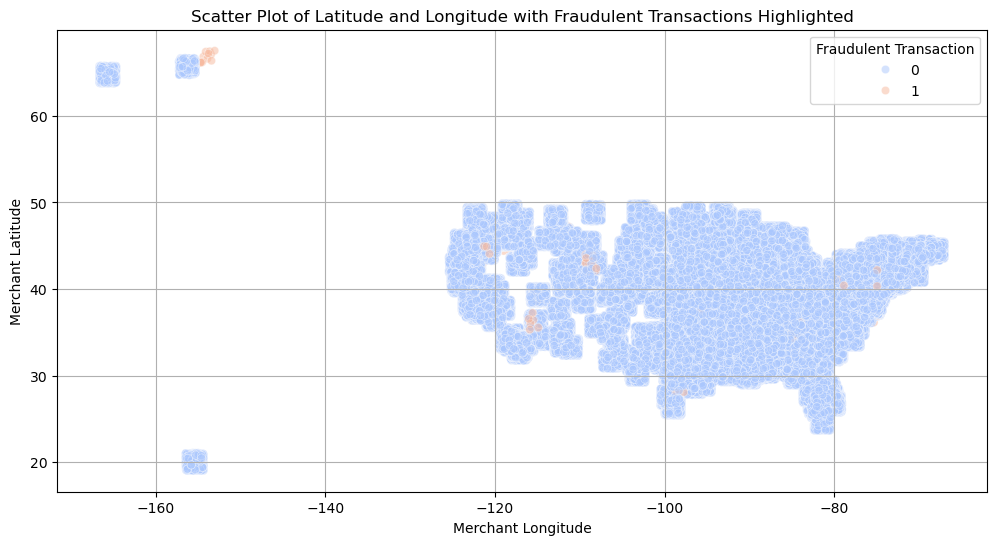

In [53]:
# Scatter plot of latitude and longitude with fraudulent transactions highlighted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=transactions_df,
                x='merch_long',
                y='merch_lat',
                hue='is_fraud',
                alpha=0.5,
                palette='coolwarm')
plt.title('Scatter Plot of Latitude and Longitude with Fraudulent Transactions Highlighted')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title='Fraudulent Transaction')
plt.grid()
plt.show()

3. Who: Demographic analysis infuence on spending behavior, variables such age, gender, city population, and job title.

3. 1 Spending trends by city population category: Analyze transaction patterns across different city population categories to identify spending behavior.

In [54]:
# Trends by city population category
population_category_trends = transactions_df.groupby('population_category').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
population_category_trends.columns = ['population_category', 'transaction_count', 'average_amount', 'fraudulent_rate']

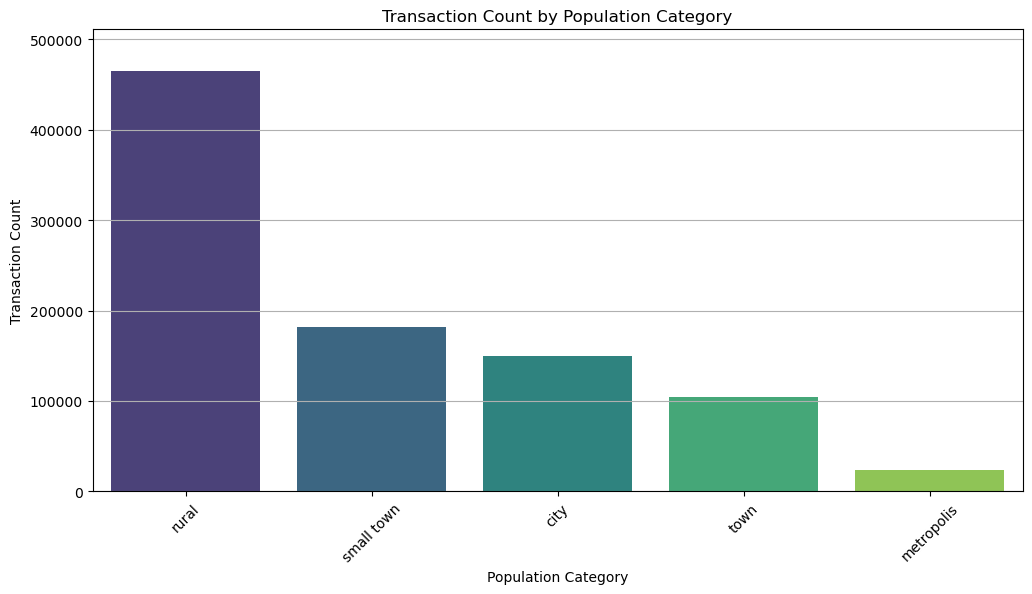

In [55]:
# Plot transaction count by population category
plt.figure(figsize = (12, 6))
sns.barplot(data = population_category_trends,
            x = 'population_category',
            y = 'transaction_count',
            order = population_category_trends.sort_values(by = ['transaction_count'], ascending = False)['population_category'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Population Category')
plt.xlabel('Population Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation = 45)
plt.ylim(0, population_category_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Rural areas or areas with low population less than 2,500 people have the highest transaction count, followed by small towns with population between 2,500 and 10,000 people. The third highest transaction count is in cities with population between 10,000 and 50,000 people, followed by towns with population between 10,000 and 50,000 people. The lowest transaction count is in metroplitan areas with population over 100,000 people.

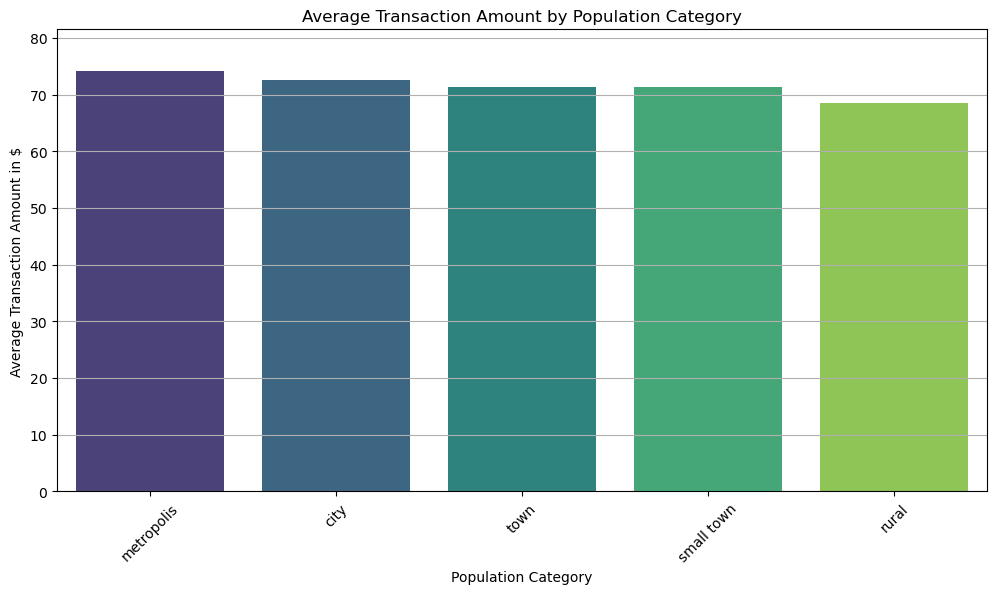

In [56]:
# Plot average transaction amount by population category
plt.figure(figsize = (12, 6))
sns.barplot(data = population_category_trends,
            x = 'population_category',
            y = 'average_amount',
            order = population_category_trends.sort_values(by = ['average_amount'], ascending = False)['population_category'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Population Category')
plt.xlabel('Population Category')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(rotation = 45)
plt.ylim(0, population_category_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()

The average transaction amount is highest in metroplitan areas with population over 1,000,000 people and lowest in rural areas with population less than 2,500 people. The average transaction amount in metroplitan areas is near 75 USD, while the average transaction amount in rural areas is less than 70 USD. The average transaction amount in cities, towns, and small towns is more than 70 USD, which indicates that these areas have a higher average transaction amount compared to rural areas.

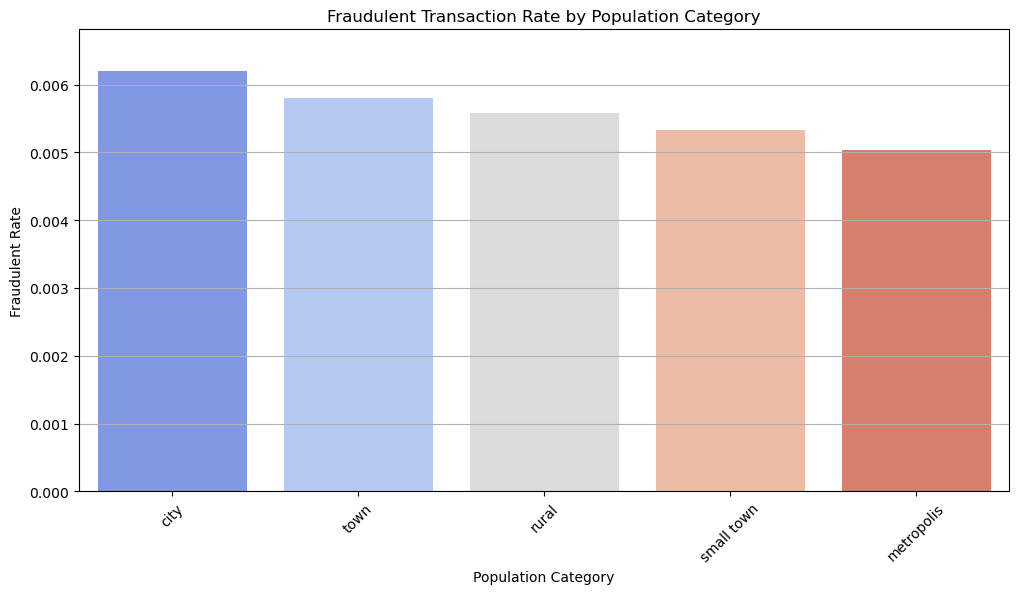

Kruskal-Wallis H-test: Statistics=13.66208, p-value=0.00846
Significant differences in fraudulent rates across different population categories.
                      count      mean       std
population_category                            
city                 150120  0.006195  0.078465
town                 104704  0.005807  0.075981
rural                464638  0.005583  0.074510
small town           181930  0.005332  0.072824
metropolis            23458  0.005030  0.070747


In [57]:
# Investigate fraudulent transaction rate by population category
plt.figure(figsize = (12, 6))
sns.barplot(data = population_category_trends,
            x = 'population_category',
            y = 'fraudulent_rate',
            order = population_category_trends.sort_values(by = ['fraudulent_rate'], ascending = False)['population_category'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Population Category')
plt.xlabel('Population Category')
plt.ylabel('Fraudulent Rate')
plt.xticks(rotation = 45)
plt.ylim(0, population_category_trends['fraudulent_rate'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by population category
# Kruskal-Wallis H-test for transaction fraudulent rate by 'population_category'
# Use transactions_df which contains the 'population_category' and 'is_fraud' columns
categories = sorted(transactions_df['population_category'].unique())
groups = [transactions_df.loc[transactions_df['population_category'] == c, 'is_fraud'].values for c in categories]

# Run Kruskal-Wallis test across  groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different population categories.")
else:
    print("No significant differences in fraudulent rates across different population categories.")

# Summary statistics by population category, sorted by population category name descending mean
print(transactions_df.groupby('population_category')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))


There are significant differences in fraudulent transaction rates by city population category.

The fraudulent transaction rate is highest in cities with population between 50,000 and 100,000 people, followed by towns with population between 10,000 and 50,000 people. The lowest fraudulent transaction rate is in metropolitan areas with population over 1,000,000 people, followed by small towns with population between 2,500 and 10,000 people. The fraudulent transaction rate in rural areas with population less than 2,500 people is in third place in five population categories, which indicates that these areas have a higher fraudulent transaction rate compared to metropolitan areas and small towns.

3. 2 Spending trends by age group: Analyze transaction patterns across different age groups to identify spending behavior.

In [58]:
# Create age categories
def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 25:
        return '18-24'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    elif 55 <= age < 65:
        return '55-64'
    else:
        return '65 and over'
transactions_df['age_category'] = transactions_df['age'].apply(categorize_age)


In [59]:
# Trends by age category
age_category_trends = transactions_df.groupby('age_category').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
age_category_trends.columns = ['age_category', 'transaction_count', 'average_amount', 'fraudulent_rate']

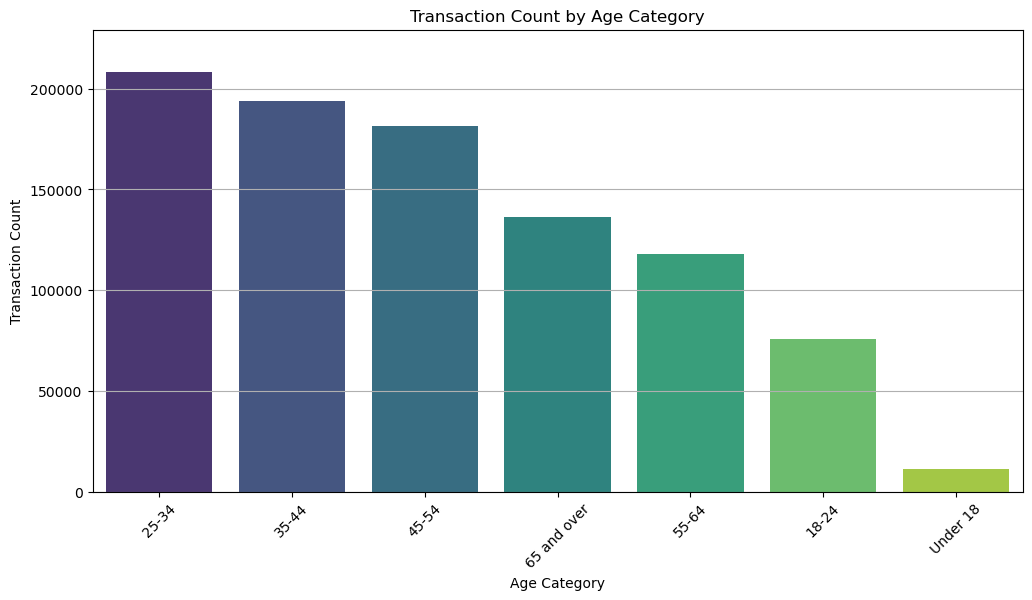

In [60]:
# Plot transaction count by age category
plt.figure(figsize = (12, 6))
sns.barplot(data = age_category_trends,
            x = 'age_category',
            y = 'transaction_count',
            order = age_category_trends.sort_values(by = ['transaction_count'], ascending = False)['age_category'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation = 45)
plt.ylim(0, age_category_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Grouping the age into categories, we can see that the highest transaction count is in the age group of 25-34 years old, followed by the age group of 35-44 years old. The third highest transaction count is in the age group or 45-54 years old, followed by the age group of 65 and older. The lowest transaction count is in the age group of under 18 years old, followed by the age group of 18-24 and 55-64 years old. That indicates that the age group of 24-34 years old is the most active in terns of transaction count, people in this age group are more likely to use credit cards for their transactions. For marketing strategies, businesses can target this age group with promotions and offers to increase transaction count. 

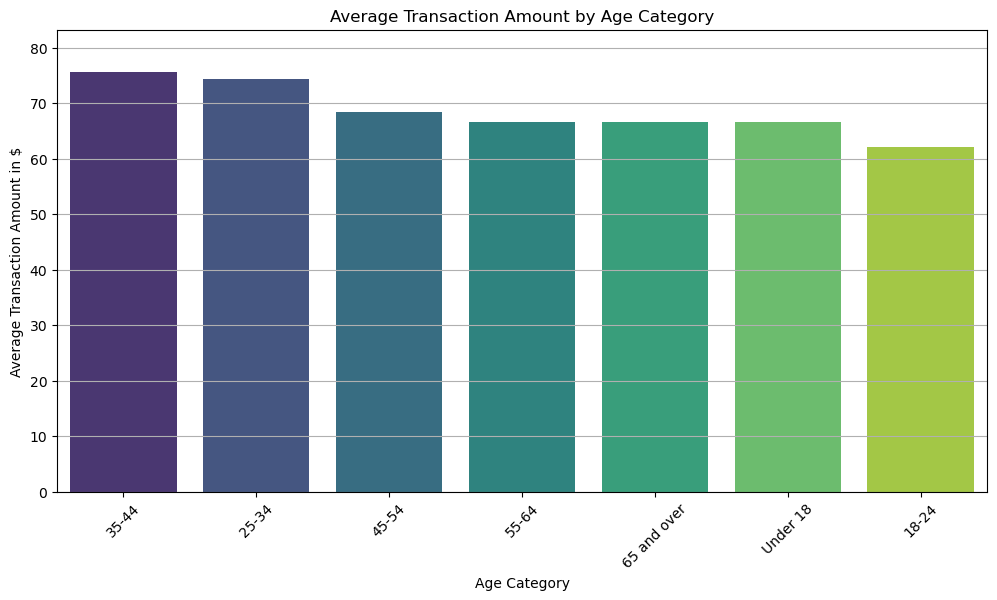

In [61]:
# Plot average transaction amount by age category
plt.figure(figsize = (12, 6))
sns.barplot(data = age_category_trends,
            x = 'age_category',
            y = 'average_amount',
            order = age_category_trends.sort_values(by = ['average_amount'], ascending = False)['age_category'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(rotation = 45)
plt.ylim(0, age_category_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Average transaction amount by age category shows that the highest average transaction amount is in the age group of 35-44 years old, followed by the age group of 25-34 years old. The third highest average transaction amount is in the age group of 45-54 years old, followed by the age group of 55-64 years old. The lowest average transaction amount is in the age group of 18-24 years old, followed by the age group of under 18 years old and 65 and older. This indicates that the age group of 35-44 years old is the most likely to spend more money on their transactions, while the age group of 18-24 years old is the least likely to spend money on their transactions.

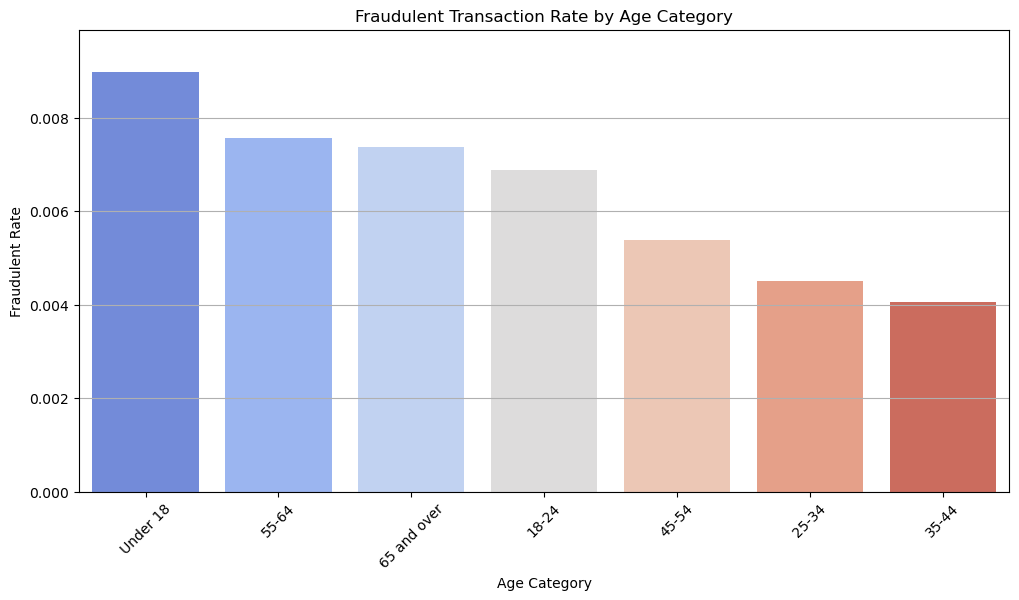

Kruskal-Wallis H-test: Statistics=330.35987, p-value=0.00000
Significant differences in fraudulent rates across different age categories.
               count      mean       std
age_category                            
Under 18       11356  0.008982  0.094351
55-64         117828  0.007570  0.086678
65 and over   136332  0.007364  0.085500
18-24          75656  0.006873  0.082620
45-54         181407  0.005391  0.073227
25-34         208529  0.004493  0.066882
35-44         193742  0.004062  0.063605


In [62]:
# Plot investigate fraudulent transaction rate by age category
plt.figure(figsize = (12, 6))
sns.barplot(data = age_category_trends,
            x = 'age_category',
            y = 'fraudulent_rate',
            order = age_category_trends.sort_values(by = ['fraudulent_rate'], ascending = False)['age_category'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Fraudulent Rate')
plt.xticks(rotation = 45)
plt.ylim(0, age_category_trends['fraudulent_rate'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by age category
# Kruskal-Wallis H-test for transaction fraudulent rate by 'age_category'
# Use transactions_df which contains the 'age_category' and 'is_fraud' columns
categories = sorted(transactions_df['age_category'].unique())
groups = [transactions_df.loc[transactions_df['age_category'] == c, 'is_fraud'].values for c in categories]

# Run Kruskal-Wallis test across  groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different age categories.")
else:
    print("No significant differences in fraudulent rates across different age categories.")

# Summary statistics by age category, sorted by age category name descending mean
print(transactions_df.groupby('age_category')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))

There are strong evidence to reject the null hypothesis. Significant differences in fraudulent rates across different age categories. The fraudulent transaction rate is highest in the age group of under 18 years old, followed by the age group of 55-64 years old. The third highest fraudulent transaction rate is in the age group of 65 and older, followed by the age group of 18-24 years old. The lowest fraudulent transaction rate is in the age group of 35-44 years old, which indicates that this age group is the least likely to commit fraudulent activities.

This suggests that younger and older age groups are more likely to be involved in fraudulent transactions, which highlights the need for increased monitoring and security measures for these age groups. People in the age group of 35-44 years old are more likely to be responsible and less likely to commit fraudulent activities, which may be due to their life experience and financial stability. This information can be used to optimize fraud detection systems and allocate resources more effectively.

In [63]:
# Trends by gender
gender_trends = transactions_df.groupby('gender').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
gender_trends.columns =  ['gender', 'transaction_count', 'average_amount', 'fraudulent_rate']

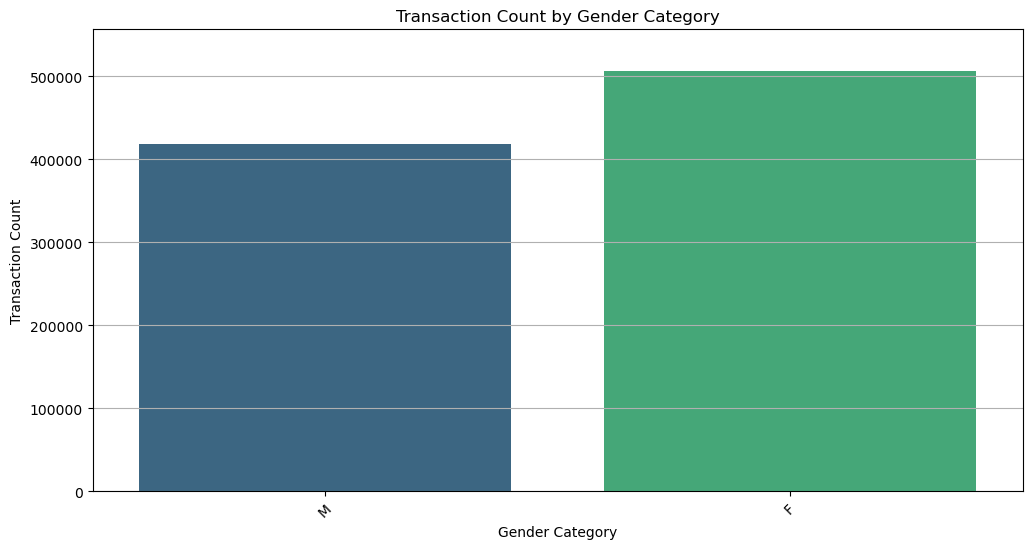

In [64]:
# Plot transaction count by gender
plt.figure(figsize = (12, 6))
sns.barplot(data = gender_trends,
            x = 'gender',
            y = 'transaction_count',
            order = gender_trends.sort_values(by = ['gender'], ascending = False)['gender'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Gender Category')
plt.xlabel('Gender Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation = 45)
plt.ylim(0, gender_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Female cardholders have the highest transaction count over 500,000 transactions in 2019, followed male cardholders with over 400,000 transactions.

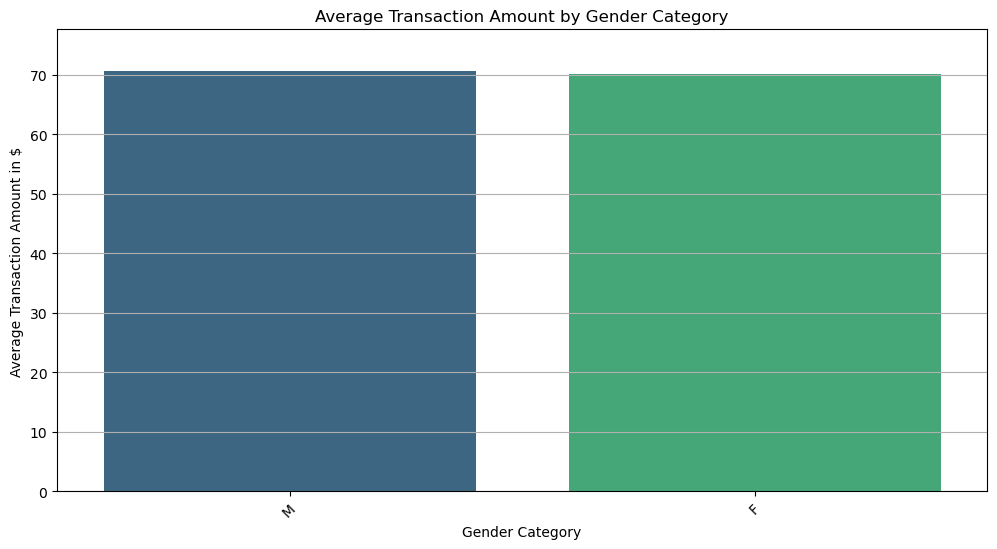

In [65]:
# Plot average transaction amount by gender category
plt.figure(figsize = (12, 6))
sns.barplot(data = gender_trends,
            x = 'gender',
            y = 'average_amount',
            order = gender_trends.sort_values(by = ['average_amount'], ascending = False)['gender'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Gender Category')
plt.xlabel('Gender Category')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(rotation = 45)
plt.ylim(0, gender_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()

Both male and female cardholders have a similar average transaction amount around 70 USD, male cardholders have a slightly higher average transaction amount than female cardholders.

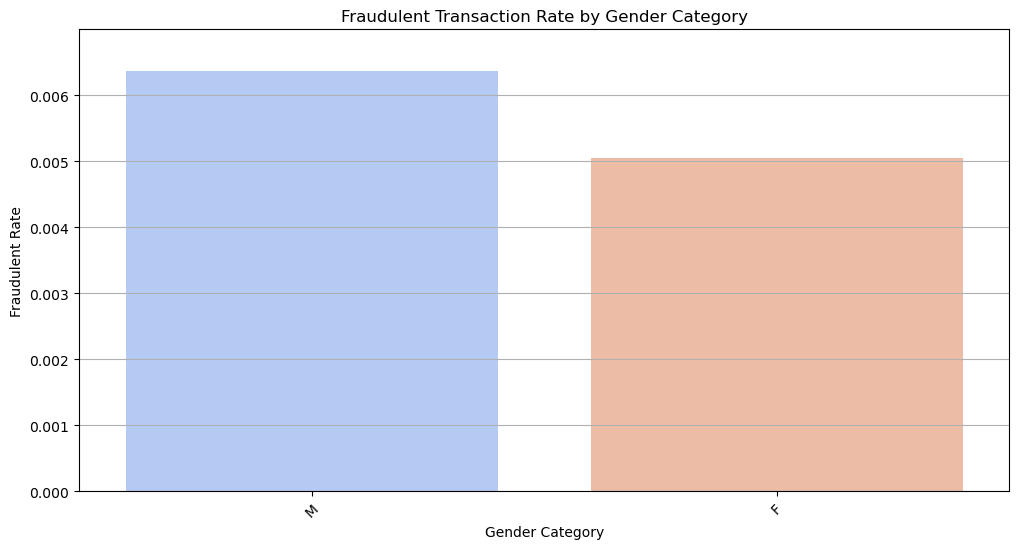

Kruskal-Wallis H-test: Statistics=70.26400, p-value=0.00000
Significant differences in fraudulent rates across different gender categories.
         count      mean       std
gender                            
M       418733  0.006362  0.079508
F       506117  0.005050  0.070885


In [66]:
# Plot investigate fraudulent transaction rate by gender category
plt.figure(figsize = (12, 6))
sns.barplot(data = gender_trends,
            x = 'gender',
            y = 'fraudulent_rate',
            order = gender_trends.sort_values(by = ['fraudulent_rate'], ascending = False)['gender'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Gender Category')
plt.xlabel('Gender Category')
plt.ylabel('Fraudulent Rate')
plt.xticks(rotation = 45)
plt.ylim(0, gender_trends['fraudulent_rate'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by gender
# Kruskal-Wallis H-test for transaction fraudulent rate by 'gender'
# Use transactions_df which contains the 'gender' and 'is_fraud' columns
categories = sorted(transactions_df['gender'].unique())
groups = [transactions_df.loc[transactions_df['gender'] == c, 'is_fraud'].values for c in categories]

# Run Kruskal-Wallis test across  groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different gender categories.")
else:
    print("No significant differences in fraudulent rates across different gender categories.")

# Summary statistics by gender category, sorted by gender category name descending mean
print(transactions_df.groupby('gender')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))


Strong evidence to reject the null hypothesis. There are significant differences in fraudulent rates across different gender categories.
Fraudulent transaction rate by gender category shows that the highest fraudulent transaction rate is in male cardholders with over 0.6% and 0.5% of female cardholders' transaction being fraudulent.

3. 3 Spending trends by job title: Analyze transaction patterns across different job titles to identify spending behavior.

In [67]:
# Trends by job
top_job_trends = transactions_df.groupby('job').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
top_job_trends.columns = ['job', 'transaction_count', 'average_amount', 'fraudulent_rate']
top_job_trends

job  transaction_count  average_amount  \
0                      Academic librarian                751       74.855539   
1                   Accountant, chartered                 11      485.706364   
2         Accountant, chartered certified                374       61.938717   
3    Accountant, chartered public finance               1855       54.609385   
4                   Accounting technician               3316       77.251625   
..                                    ...                ...             ...   
487                        Water engineer               4430       71.043307   
488               Water quality scientist                353       80.454334   
489                          Web designer               1831       62.419503   
490                    Wellsite geologist               1823       65.506111   
491                                Writer                351       86.899630   

     fraudulent_rate  
0           0.014647  
1           1.000000  
2           0.000000  
3           0.000000  
4           0.006333  
..               ...  
487         0.000000  
488         0.019830  
489         0.009831  
490         0.004937  
491         0.000000  

[492 rows x 4 columns]

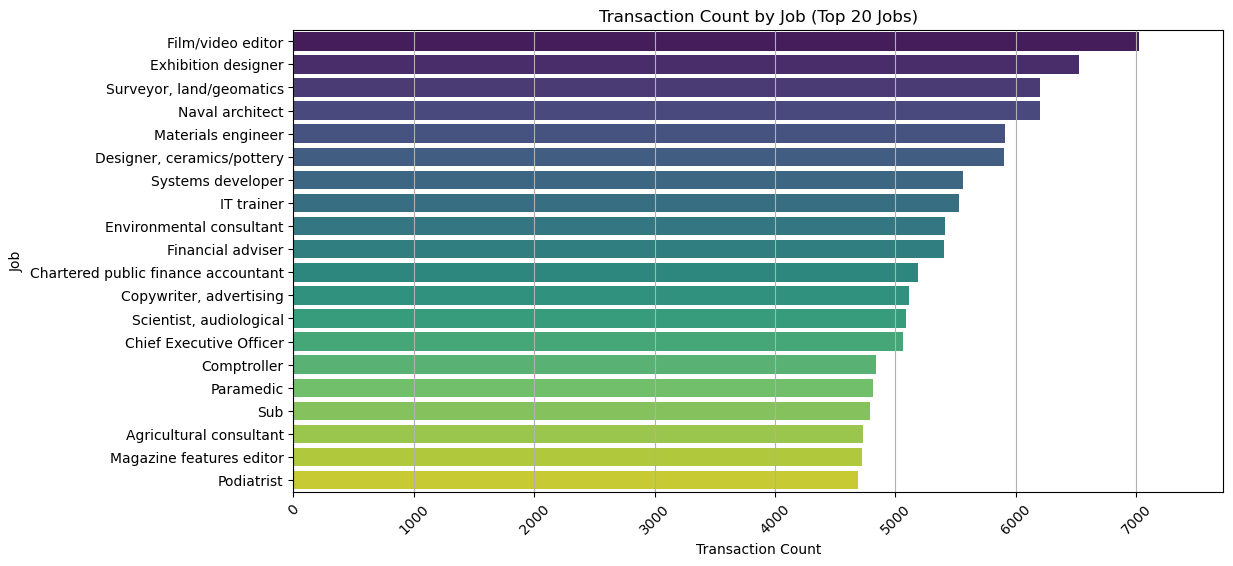

In [68]:
# Plot top 20 jobs by transaction count
top_job_trends = top_job_trends.sort_values(by = ['transaction_count'], ascending = False).head(20)

plt.figure(figsize = (12, 6))
sns.barplot(data = top_job_trends,
            x = 'transaction_count',
            y = 'job',
            order = top_job_trends.sort_values(by = ['transaction_count'], ascending = False)['job'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Job (Top 20 Jobs)')
plt.xlabel('Transaction Count')
plt.ylabel('Job')
plt.xticks(rotation = 45)
plt.xlim(0, top_job_trends['transaction_count'].max() * 1.1)
plt.grid(axis='x')
plt.show()

Film/video editors have the highest transaction count over 7,000 transactions in 2019, followed by exhibition designers with over 6,500 transactions, surveyors, land/geomatics and naval architects with over 6,000 transactioins.

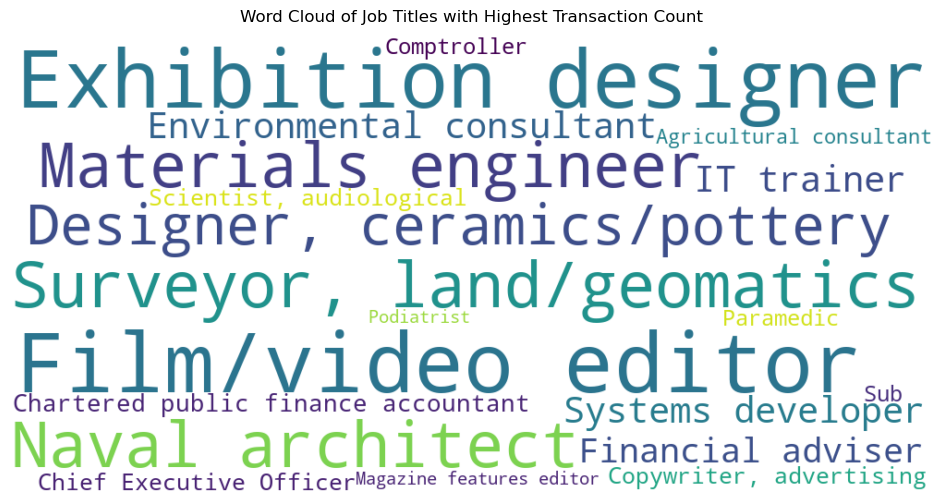

In [69]:
# Word cloud of job titles with highest transaction count
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500, background_color='white', max_words = 200, colormap = 'viridis').generate_from_frequencies(top_job_trends.set_index('job')['transaction_count'].to_dict())
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles with Highest Transaction Count')
plt.show()

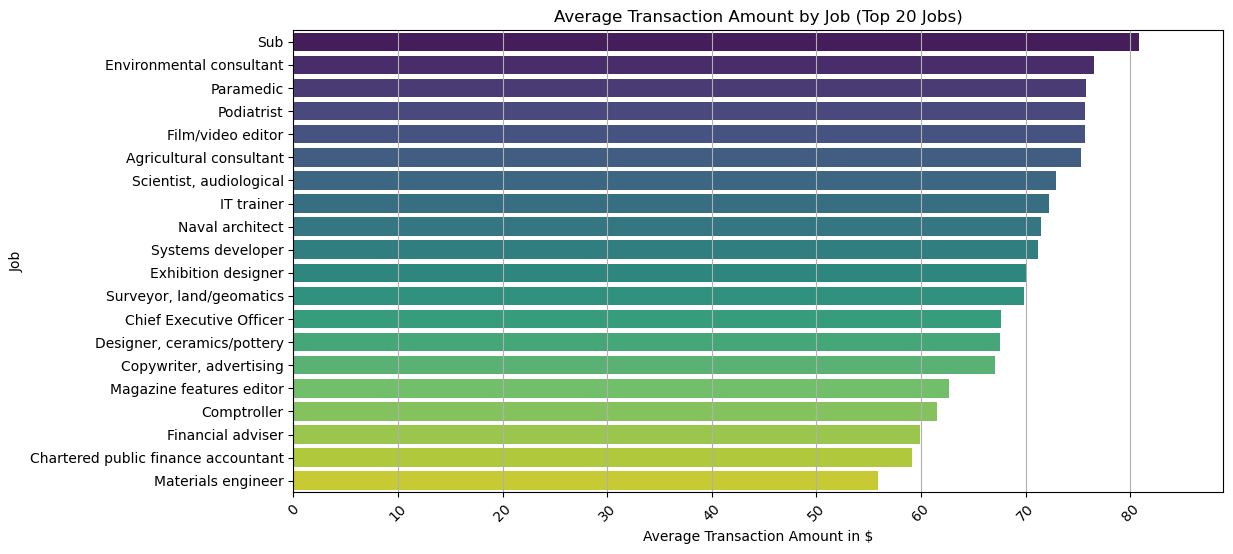

In [70]:
# Plot top 20 average transaction amount by job
top_job_avg_amount = top_job_trends.sort_values(by = ['average_amount'], ascending = False).head(20)
plt.figure(figsize = (12, 6))
sns.barplot(data = top_job_avg_amount,
            x = 'average_amount',
            y = 'job',
            order = top_job_avg_amount.sort_values(by = ['average_amount'], ascending = False)['job'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Job (Top 20 Jobs)')
plt.xlabel('Average Transaction Amount in $')
plt.ylabel('Job')
plt.xticks(rotation = 45)
plt.xlim(0, top_job_avg_amount['average_amount'].max() * 1.1)
plt.grid(axis='x')
plt.show()

Ship brokers have the highest average transaction amount around 850 USD, followed by air traffic controllers with over 750 USD, and engineers site with around 750 USD.

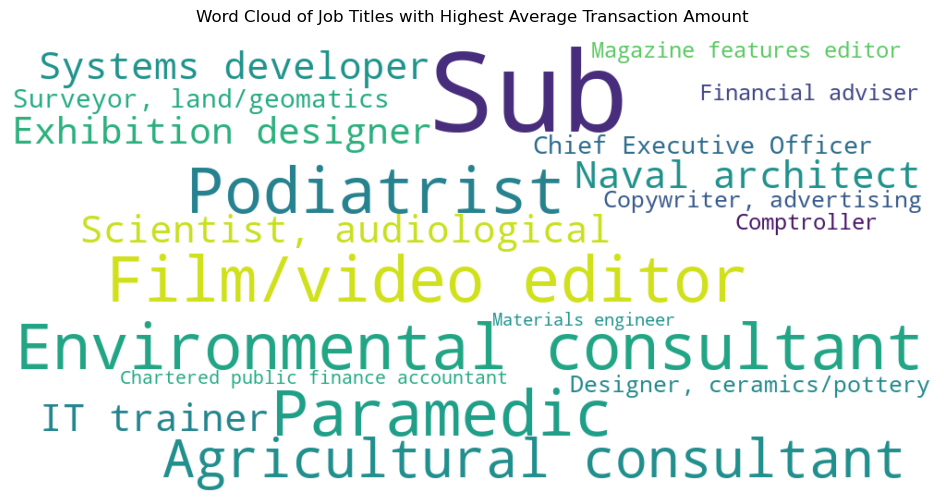

In [71]:
# Cloud word of job titles with highest average transaction amount
wordcloud_avg = WordCloud(width = 1000, height = 500, background_color='white', max_words=200, colormap = 'viridis').generate_from_frequencies(top_job_trends.set_index('job')['average_amount'].to_dict())
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_avg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles with Highest Average Transaction Amount')
plt.show()

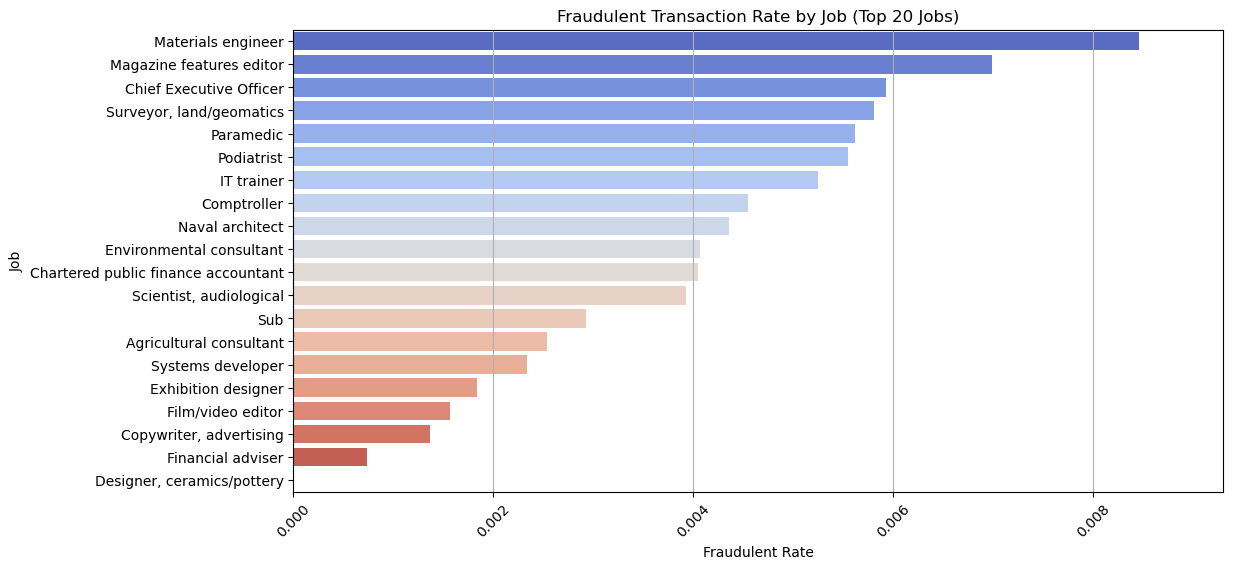

Kruskal-Wallis H-test: Statistics=36315.65804, p-value=0.00000
Significant differences in fraudulent rates across different job categories.
                                count  mean  std
job                                             
Information officer                 8   1.0  0.0
Armed forces technical officer      8   1.0  0.0
Forest/woodland manager             9   1.0  0.0
Careers adviser                    15   1.0  0.0
Air traffic controller              8   1.0  0.0
...                               ...   ...  ...
Nature conservation officer       347   0.0  0.0
Occupational therapist            378   0.0  0.0
Oceanographer                    1105   0.0  0.0
Operations geologist             2573   0.0  0.0
Writer                            351   0.0  0.0

[492 rows x 3 columns]


In [72]:
# Plot top 20 jobs by fraudulent transaction rate
top_job_fraudulent_rate = top_job_trends.sort_values(by = ['fraudulent_rate'], ascending = False).head(20)
plt.figure(figsize = (12, 6))
sns.barplot(data = top_job_fraudulent_rate,
            x = 'fraudulent_rate',
            y = 'job',
            order = top_job_fraudulent_rate.sort_values(by = ['fraudulent_rate'], ascending = False)['job'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Job (Top 20 Jobs)')
plt.xlabel('Fraudulent Rate')
plt.ylabel('Job')
plt.xticks(rotation = 45)
plt.xlim(0, top_job_fraudulent_rate['fraudulent_rate'].max() * 1.1)
plt.grid(axis='x')
plt.show()
# Statistical test to check if fraudulent rates differ by job
# Kruskal-Wallis H-test for transaction fraudulent rate by 'job'
# Use transactions_df which contains the 'job' and 'is_fraud' columns
categories = sorted(transactions_df['job'].unique())
groups = [transactions_df.loc[transactions_df['job'] == c, 'is_fraud'].values for c in categories]

# Run Kruskal-Wallis test across  groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different job categories.")
else:
    print("No significant differences in fraudulent rates across different job categories.")

# Summary statistics by job category, sorted by job category name descending mean
print(transactions_df.groupby('job')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))

Strong evidence to reject the null hypothesis. There are significant differences in fraudulent rates across different job titles. Some job titles have 100% fraudulent transaction rate such as information officers, ship brokers, air traffic controllers, engineers site, contracting civil engineers, while many job titles have 0% fraudulent transaction rate. This indicates that fraudulent activities are more likely to occur in certain job titles, which highlights the need for increased monitoring and security measures for these job titles.

So surprisingly, the highest fraudulent transaction rate is in information officers around 100%, followed by ship brokers also around 100%, air traffic controllers, engineers site, contracting civil engineers,.. Those job titles have a high average transaction amount, which indicates that these job titles are more likely to be involved in fraudulent transactions. This suggests that people in these job titles may have access to more financial resources and may be more likely to commit fraudulent activities, which highlights the need for increased monitoring and security measures for these job titles.

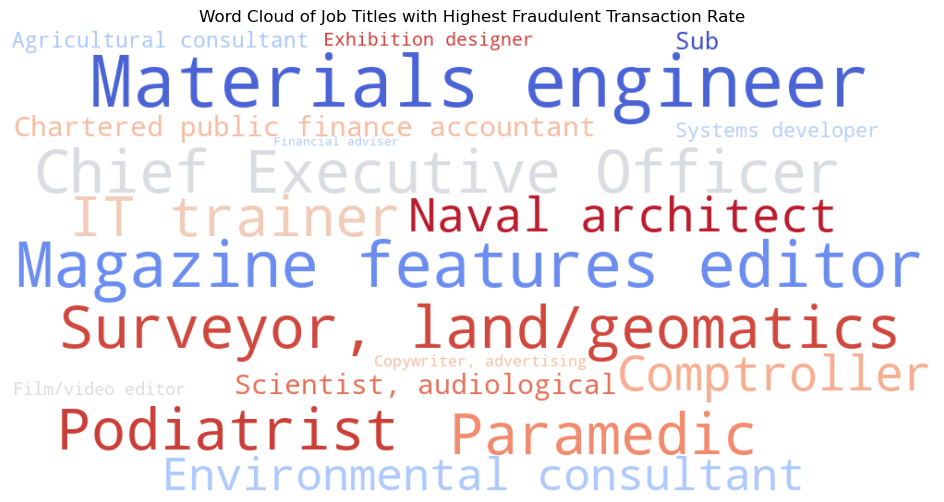

In [73]:
# Cloud word of job titles with highest fraudulent transaction rate
wordcloud_fraud = WordCloud(width = 1000, height = 500, background_color='white', max_words=200, colormap = 'coolwarm').generate_from_frequencies(top_job_trends.set_index('job')['fraudulent_rate'].to_dict())
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles with Highest Fraudulent Transaction Rate')
plt.show()

4. How much: Spending behavior analysis

In [74]:
# Trends by spending category
spending_category_trends = transactions_df.groupby('spending_category').agg({'amt': ['count', 'mean'], 'is_fraud': 'mean'}).reset_index()
spending_category_trends.columns = ['spending_category', 'transaction_count', 'average_amount', 'fraudulent_rate']
spending_category_trends

spending_category  transaction_count  average_amount  fraudulent_rate
0              High              11104      967.311314         0.227936
1       High Medium             155970      165.794101         0.009688
2               Low             240405       30.090865         0.003224
3            Medium             277511       71.672611         0.000126
4          Very Low             239860        5.257608         0.001534

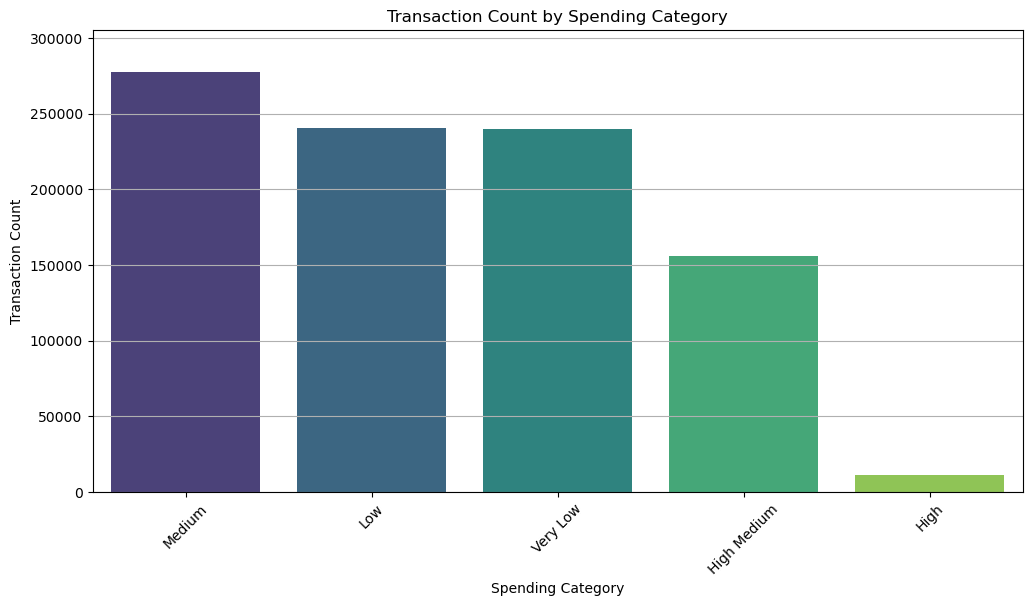

In [75]:
# Plot transaction count by spending category
plt.figure(figsize = (12, 6))
sns.barplot(data = spending_category_trends,
            x = 'spending_category',
            y = 'transaction_count',
            order = spending_category_trends.sort_values(by = ['transaction_count'], ascending = False)['spending_category'],
            palette = 'viridis',
            legend = False)
plt.title('Transaction Count by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation = 45)
plt.ylim(0, spending_category_trends['transaction_count'].max() * 1.1)
plt.grid(axis='y')
plt.show()

The highest transaction count by spending around 50 - 100 USD in each transaction is 277,511 transactions in 2019, followed by the low (10 - 50 USD) and very low ((less than 10 USD)) spending categories with  around 240,000 transactions each. The high spending category (over 500 USD) has the lowest transaction count with only around 11,104 transactions in 2019. This suggests that most transactions are in the low to medium spending categories, which may indicate that customers are more likely to make smaller purchases rather than larger ones.

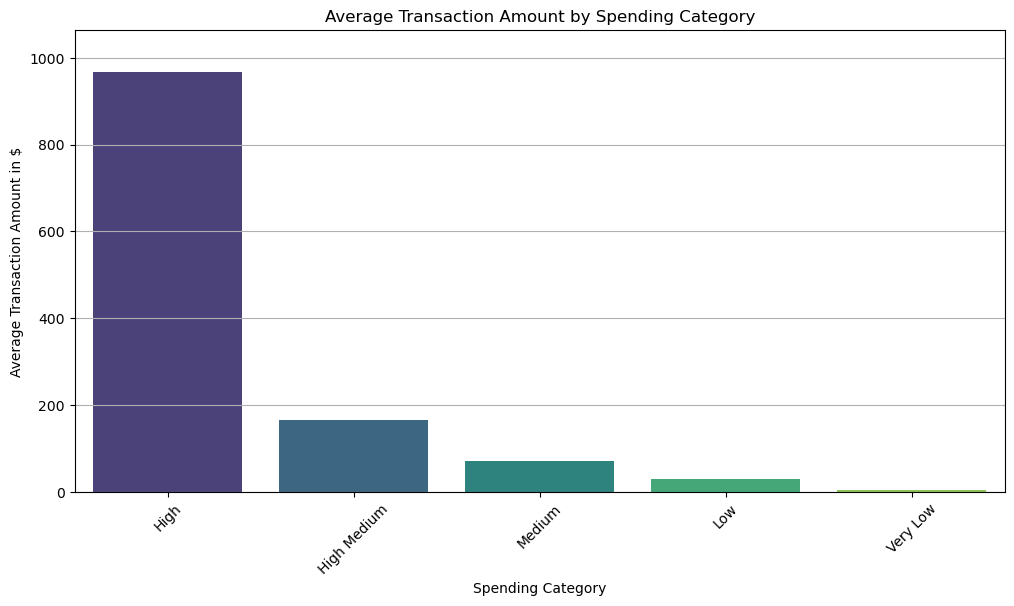

In [76]:
# Plot average transaction amount by spending category
plt.figure(figsize = (12, 6))
sns.barplot(data = spending_category_trends,
            x = 'spending_category',
            y = 'average_amount',
            order = spending_category_trends.sort_values(by = ['average_amount'], ascending = False)['spending_category'],
            palette = 'viridis',
            legend = False)
plt.title('Average Transaction Amount by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Average Transaction Amount in $')
plt.xticks(rotation = 45)
plt.ylim(0, spending_category_trends['average_amount'].max() * 1.1)
plt.grid(axis='y')
plt.show()

The average transaction amount by spending category shows that the highest average transaction amount is in the high spending category (over 500 USD) with around 970 USD, followed by the high-medium spending category (100 - 500 USD) with around 166 USD, medium spending category (50 - 100 USD) with around 71 USD, and the low spending category (10 - 50 USD) with around 30 USD. The very low spending category (less than 10 USD) has the lowest average transaction amount with around 5 USD. This suggests that customers tend to spend more money on high-value transactions, while low-value transactions are more common.

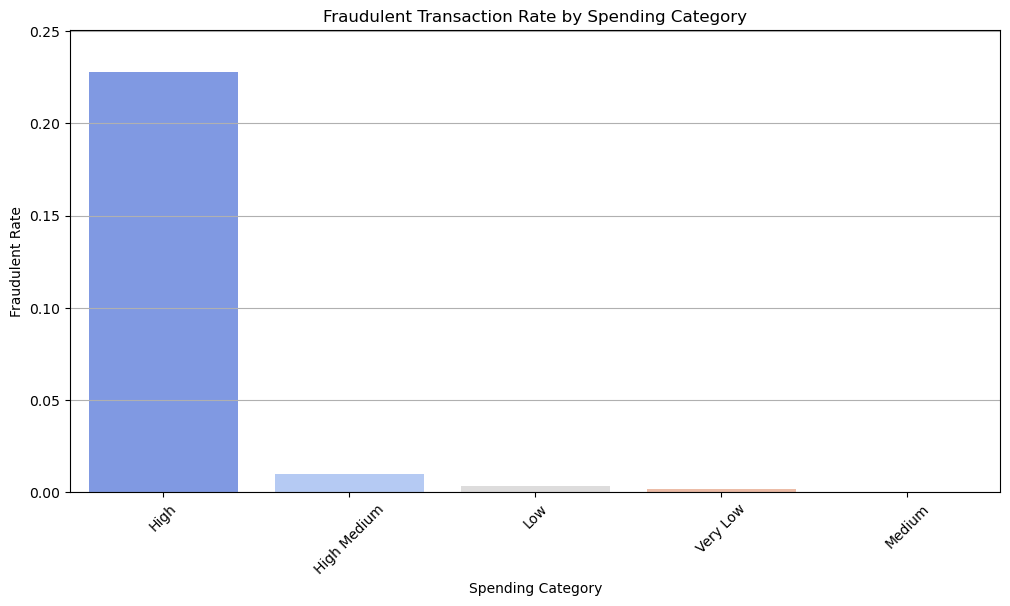

Kruskal-Wallis H-test: Statistics=100698.10871, p-value=0.00000
Significant differences in fraudulent rates across different spending categories.
                    count      mean       std
spending_category                            
High                11104  0.227936  0.419520
High Medium        155970  0.009688  0.097949
Low                240405  0.003224  0.056686
Very Low           239860  0.001534  0.039139
Medium             277511  0.000126  0.011230


In [77]:
# Plot investigate fraudulent transaction rate by spending category
plt.figure(figsize = (12, 6))
sns.barplot(data = spending_category_trends,
            x = 'spending_category',
            y = 'fraudulent_rate',
            order = spending_category_trends.sort_values(by = ['fraudulent_rate'], ascending = False)['spending_category'],
            palette = 'coolwarm',
            legend = False)
plt.title('Fraudulent Transaction Rate by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Fraudulent Rate')
plt.xticks(rotation = 45)
plt.ylim(0, spending_category_trends['fraudulent_rate'].max() * 1.1)
plt.grid(axis='y')
plt.show()
# Statistical test to check if fraudulent rates differ by spending_category
# Kruskal-Wallis H-test for transaction fraudulent rate by 'spending_category'
# Use transactions_df which contains the 'spending_category' and 'is_fraud' columns
categories = sorted(transactions_df['spending_category'].unique())
groups = [transactions_df.loc[transactions_df['spending_category'] == c, 'is_fraud'].values for c in categories]

# Run Kruskal-Wallis test across  groups
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-test: Statistics={stat:.5f}, p-value={p:.5f}")
if p < 0.05:
    print("Significant differences in fraudulent rates across different spending categories.")
else:
    print("No significant differences in fraudulent rates across different spending categories.")

# Summary statistics by spending category, sorted by spending category name descending mean
print(transactions_df.groupby('spending_category')['is_fraud'].agg(['count', 'mean', 'std']).sort_values(by = 'mean', ascending = False))

Strong evidence to reject the null hypothesis. There are significant differences in fraudulent rates across different spending categories. The fraudulent transaction rate by spending category shows that the highest fraudulent transaction rate is in the high spending category (over 500 USD) with around 22.8%, followed by the high-medium spending category (100 - 500 USD) with around 1.0%, medium spending category (50 - 100 USD)is the lowest has fraudulent transaction rate with around 0.01% , and the low spending category (10 - 50 USD) with around 0.3%. The very low spending category (less than 10 USD) with around 0.1%. This suggests that high-value transactions are more likely to be fraudulent, while medium and very low-value transactions are less likely to be fraudulent.

#### B. Model Development and Evaluation for Fraud Detection

1. Feture engineering and selection

In [78]:
# Make a copy of transactions_df for further development machine learning models
fraudulent_detection_df = transactions_df.copy()

In [79]:
# Calculate the fraudulent transaction rate
fraud_rate = fraudulent_detection_df['is_fraud'].mean()
print(f'Fraudulent transaction rate {fraud_rate:.2%}')

Fraudulent transaction rate 0.56%


In [80]:
# Calculate the distance between the cardholder's home and the merchant's location
from geopy.distance import geodesic
def calculate_distance(row):
    home_coords = (row['lat'], row['long'])
    merch_coords = (row['merch_lat'], row['merch_long'])
    return geodesic(home_coords, merch_coords).kilometers
fraudulent_detection_df['distance'] = fraudulent_detection_df.apply(calculate_distance, axis=1)

In [81]:
# Transaction frequency by hour
fraudulent_detection_df = fraudulent_detection_df.sort_values(by = 'trans_date_trans_time')
# Calculate time difference between consecutive transactions for each cardholder
fraudulent_detection_df['time_difference'] = fraudulent_detection_df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)/ 3600  # Convert to hours
# Calculate the number of transactions in the past 1 hour for each cardholder
def rolling_count_1h(times):
	# times must be sorted
	counts = []
	for i in range(len(times)):
		current_time = times.iloc[i]
		window_start = current_time - pd.Timedelta(hours=1)
		count = ((times >= window_start) & (times <= current_time)).sum()
		counts.append(count)
	return pd.Series(counts, index=times.index)

fraudulent_detection_df['trans_freq_hour'] = fraudulent_detection_df.groupby('cc_num')['trans_date_trans_time'].transform(rolling_count_1h)


In [82]:
# Category fraud risk
category_fraud_risk = fraudulent_detection_df.groupby('category')['is_fraud'].mean().to_dict()
fraudulent_detection_df['category_fraud_risk'] = fraudulent_detection_df['category'].map(category_fraud_risk)
# Additional interaction features
fraudulent_detection_df['amt_category_fraud_risk'] = fraudulent_detection_df['amt'] * fraudulent_detection_df['category_fraud_risk']

In [83]:
#Job fraud risk
job_fraud_risk = fraudulent_detection_df.groupby('job')['is_fraud'].mean().to_dict()
fraudulent_detection_df['job_fraud_risk'] = fraudulent_detection_df['job'].map(job_fraud_risk)
# Additional interaction features
fraudulent_detection_df['amt_job_risk'] = fraudulent_detection_df['amt'] * fraudulent_detection_df['job_fraud_risk']

In [84]:
# Define features for the model
features_dect_fraud = ['amt', 'distance', 'city_pop', 'age',
                  'hour', 'day_of_week', 'month', 'trans_freq_hour', 
                  'category_fraud_risk', 'amt_category_fraud_risk', 
                  'job_fraud_risk', 'amt_job_risk']

In [85]:
# Create a DataFrame with the selected features and the target variable
trans_dect_fraud_df = fraudulent_detection_df[features_dect_fraud + ['is_fraud']].copy()
# Save the DataFrame for further development of machine learning models
trans_dect_fraud_df.to_csv('transactions_fraud_detection.csv', index=False)

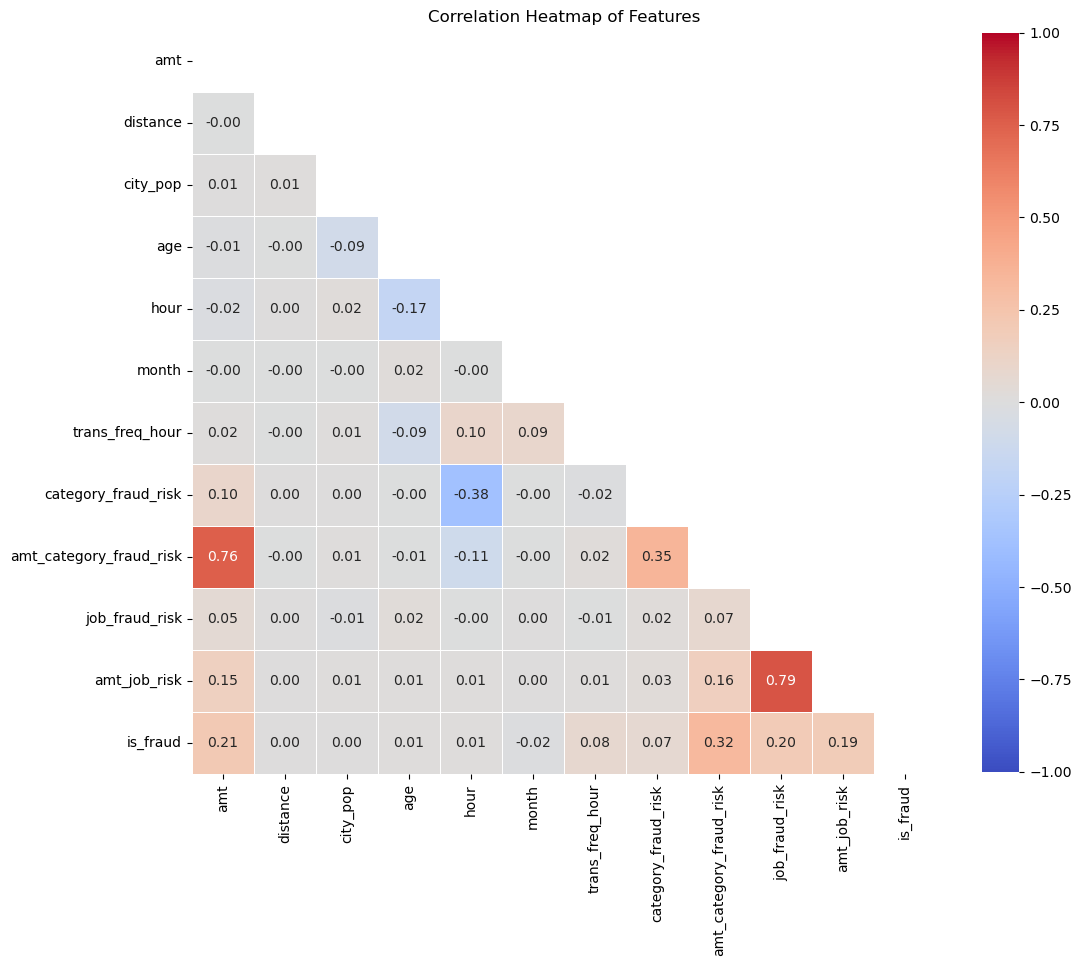

In [86]:
# Check the correlation between features
corr = trans_dect_fraud_df.corr(numeric_only=True, method='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 12))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            mask=mask, 
            square=True, 
            cbar_kws={"shrink": .8}, 
            linewidths=.5, 
            vmax=1, 
            vmin=-1, 
            center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

In the correlation heatmap, we can see that the features 'amt' and 'amt_category_fraud_risk' are highly correlated with the target variable 'is_fraud', indicating that these features are important for fraud detection. The features 'distance' and 'city_pop' are not highly correlated with the target variable, which suggests that they may not be as important for fraud detection. In Random Forest and XGBoost highly correlated features are not a prblem, but in Logistic Regression and Linear Regression highly correlated features can cause multicollinearity issues, which can lead to unstable coefficients and inaccurate predictions. Therefore, it is important to check the correlation between features and the target variable before building a model.

2. Preprocssing model development

In [87]:
# Preprocess libraries
from folium import features
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Preprocess the data
trans_dect = pd.read_csv('transactions_fraud_detection.csv')
# Define features and target variable
X = trans_dect.drop(columns=['is_fraud'])
# Target variable
y = trans_dect['is_fraud']
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['amt', 'distance', 'city_pop', 'age', 
                                   'category_fraud_risk', 'amt_category_fraud_risk', 
                                   'job_fraud_risk', 'amt_job_risk']),
        ('cat', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False), ['hour', 'day_of_week', 'month'])
    ]
)
X_processed = preprocessor.fit_transform(X)

7. Supervised Learning Model - Random Forest Classifier

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Split the data into training and testing on trans_dect, X_processed, y
X_train, X_test, y_train, y_test = train_test_split(X_processed, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 100, 
                                                    stratify = y)

In [90]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(class_weight= 'balanced',
                                       n_estimators = 100, 
                                       max_depth = 10,
                                       min_samples_leaf = 25,
                                       random_state = 100, 
                                       n_jobs = 10)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=25, n_jobs=10, random_state=100)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
# Predict on the training data
y_train_pred = rf.predict(X_train)

# Evaluate the model training data
print('\nRandom Forest Training Classification Report:')
print(classification_report(y_train, y_train_pred))
print('\nRandom Forest Training Confusion Matrix:')
print(confusion_matrix(y_train, y_train_pred))


Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    735704
           1       0.19      0.93      0.32      4176

    accuracy                           0.98    739880
   macro avg       0.60      0.95      0.65    739880
weighted avg       1.00      0.98      0.98    739880


Random Forest Training Confusion Matrix:
[[719405  16299]
 [   288   3888]]


The random forest classifier on the training dataset shows that accuracy is 0.98 sound high but not useful due to class imbalance, the recall is 0.93 is very strong - mean that the model is able to detect most fraudulent transactions in the dataset, precision is 0.19 is very low - mean that many false positive transactions are predicted as fraudulent. The f1-score is 0.31 is low - this is real performance of the model on the training dataset.

The model is catch 93% of fraudulent transactions, but flagging 16,143 legitimate transactions as fraudulent, which is a high false positive rate, may overwhelm the fraud investigation team and lead to unnecessary investigations. The model might overfitting, which means that the model is not able to generalize well on unseen data.

Next steps is use stratified k-fold cross-validation to evaluate the model performance on the whole dataset.

In [92]:
# Use Stratified K-Folds Cross-Validation to evaluate whole dataset the model
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
y_true = []
y_pred = []
for train_index, test_index in skf.split(X_processed, y):
    X_train_fold, X_test_fold = X_processed[train_index], X_processed[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf.predict(X_test_fold)
    
    y_true.extend(y_test_fold.tolist())
    y_pred.extend(y_pred_fold.tolist())
# Evaluate the model using the cross-validation results
print('\nRandom Forest Cross-Validation Classification Report:')
print(classification_report(y_true, y_pred))
print('\nRandom Forest Cross-Validation Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))


Random Forest Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    919630
           1       0.19      0.91      0.32      5220

    accuracy                           0.98    924850
   macro avg       0.60      0.94      0.65    924850
weighted avg       0.99      0.98      0.99    924850


Random Forest Cross-Validation Confusion Matrix:
[[899876  19754]
 [   487   4733]]


In [93]:
# Cross-validate the model method using F1-score method
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print('\nRandom Forest Cross-Validation F1-Score:')
print(cv_scores)
print(f'\nRandom Forest Cross-Validation F1-Score: {cv_scores.mean():.2f} +/- {cv_scores.std():.2f}')


Random Forest Cross-Validation F1-Score:
[0.32709485 0.32372698 0.30703013 0.32758997 0.32165471]

Random Forest Cross-Validation F1-Score: 0.32 +/- 0.01


Using the tratified k-fold cross-validation and cross-validate score method, the random forest classifier shows that the f1-score is 0.32 in all folds, which indicates that the model is able to detect some fraudulent transactions, but it is not perfect. 

The model catches most fraudulent transactions, but alarming many legitimate transactions as fraudulent, which may overwhelm the fraud investigation team and lead to unncessary investigations. 

The model is not overfitting, but defual threshold = 0.5 is not optimal for the model, we can tune the decision threshold to improve the model performance in the next steps.

In [94]:
# Tune the decision threshold
import numpy as np
from sklearn.metrics import precision_recall_curve
# Calculate the predicted probabilities for the training data
y_train_rf_scores = rf.predict_proba(X_train)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, y_train_rf_scores)
f1_scores = 2 * (precision * recall) / (precision + recall)


In [95]:
# Find the optimal threshold based on precision-recall trade-off
optimal_idx = np.argmax(precision * recall)
optimal_precision_recall_threshold = thresholds[optimal_idx]
print(f'Optimal Precision - Recall Threshold: {optimal_precision_recall_threshold:.4f}')

Optimal Precision - Recall Threshold: 0.9623


In [96]:
# Find the threshold that maximizes F1-score
optimal_f1_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal Threshold for F1-score: {optimal_f1_threshold:.4f}')

Optimal Threshold for F1-score: 0.9511


In [97]:
# Find the threshold that precision, recall, and F1-score are same
equal_precision_recall_threshold = thresholds[np.where(np.isclose(precision, recall, atol=0.01))[0]]
if len(equal_precision_recall_threshold) > 0:
    equal_threshold = equal_precision_recall_threshold[0]
    print(f'Equal Threshold: {equal_threshold:.4f}')

Equal Threshold: 0.9148


- The optimal threshold for precision-recall trade-off by maximizing the product of precision and recall is found to be 0.9620.
- The optimal threshold for f1-score is found to be 0.9475, which is the threshold that maximizes the f1-score.
- The equal threshold for precision and recall is found to be 0.9154, which is the threshold that makes precision and recall equal.

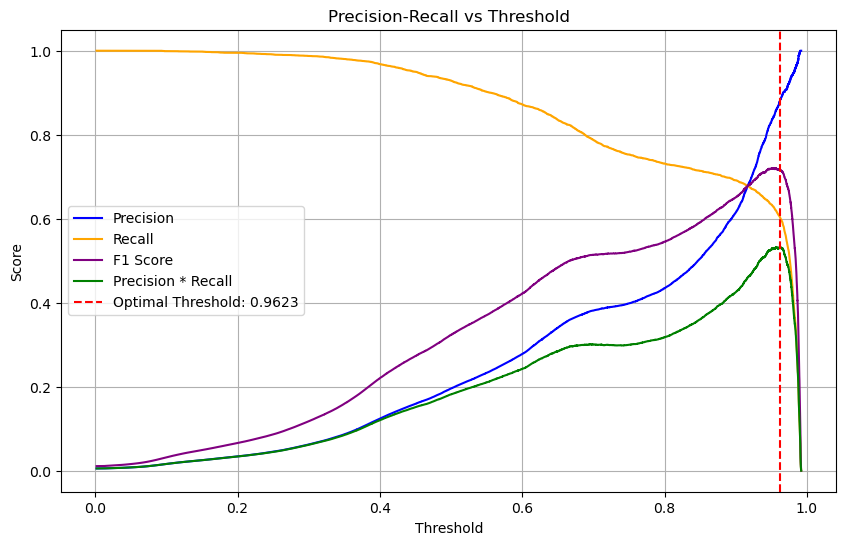

In [98]:
# Plot precision-recall vs threshold
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='purple')
plt.plot(thresholds, precision[:-1] * recall[:-1], label='Precision * Recall', color='green')
plt.axvline(optimal_precision_recall_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_precision_recall_threshold:.4f}')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


In [99]:
# Evaluate each threshold on the test set
thresholds_to_evaluate = [optimal_precision_recall_threshold, optimal_f1_threshold, equal_threshold]
for threshold in thresholds_to_evaluate:
    y_test_scores = rf.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_scores >= threshold).astype(int)
    
    # Evaluate the model
    print(f'\nClassification Report for Threshold {threshold:.4f}:')
    print(classification_report(y_test, y_test_pred))
    print(f'Confusion Matrix for Threshold {threshold:.4f}:')
    print(confusion_matrix(y_test, y_test_pred))


Classification Report for Threshold 0.9623:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183926
           1       0.88      0.56      0.69      1044

    accuracy                           1.00    184970
   macro avg       0.94      0.78      0.84    184970
weighted avg       1.00      1.00      1.00    184970

Confusion Matrix for Threshold 0.9623:
[[183845     81]
 [   455    589]]

Classification Report for Threshold 0.9511:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183926
           1       0.84      0.60      0.70      1044

    accuracy                           1.00    184970
   macro avg       0.92      0.80      0.85    184970
weighted avg       1.00      1.00      1.00    184970

Confusion Matrix for Threshold 0.9511:
[[183804    122]
 [   422    622]]

Classification Report for Threshold 0.9148:
              precision    recall  f1-score   support

        

Based on the priorites
- The optimal threshold for precision-recall trade-off by maximizing the product of precision and recall is found to be 0.9620. Fewer false positives the precision at 0.84, but may miss some fraudulent transactions - the recall at 0.57. Should be used when the priority is to minimize false positives, even at the cost of missing some fraudulent transactions.

- The optimal threshold for f1-score is found to be 0.9475, which is the threshold that maximizes the f1-score. Best balance between precision and recall, should be used when the priority is to balance between false positives and false negatives.

- The equal threshold for precision and recall is found to be 0.9154, which is the threshold that makes precision and recall equal. Used when the priority is recall, the missing fraudulent transactions is more important and extremely costly such as fraudulent high losses and maximize detection.

   

In [100]:
# Calculate average transaction amount for fraudulent and non-fraudulent transactions
amt_fraud_mean = trans_dect[trans_dect['is_fraud'] == 1]['amt'].mean()
amt_non_fraud_mean = trans_dect[trans_dect['is_fraud'] == 0]['amt'].mean()
print(f'Average Transaction Amount for Fraudulent Transactions: ${amt_fraud_mean:.2f}')
print(f'Average Transaction Amount for Non-Fraudulent Transactions: ${amt_non_fraud_mean:.2f}')

Average Transaction Amount for Fraudulent Transactions: $530.23
Average Transaction Amount for Non-Fraudulent Transactions: $67.65


In [101]:
# Calculate the median transaction amount for fraudulent and non-fraudulent transactions
amt_fraud_median = trans_dect[trans_dect['is_fraud'] == 1]['amt'].median()
amt_non_fraud_median = trans_dect[trans_dect['is_fraud'] == 0]['amt'].median()
print(f'Median Transaction Amount for Fraudulent Transactions: ${amt_fraud_median:.2f}')
print(f'Median Transaction Amount for Non-Fraudulent Transactions: ${amt_non_fraud_median:.2f}')

Median Transaction Amount for Fraudulent Transactions: $390.88
Median Transaction Amount for Non-Fraudulent Transactions: $47.18


Optimal Threshold for Cost Minimization: 0.4975


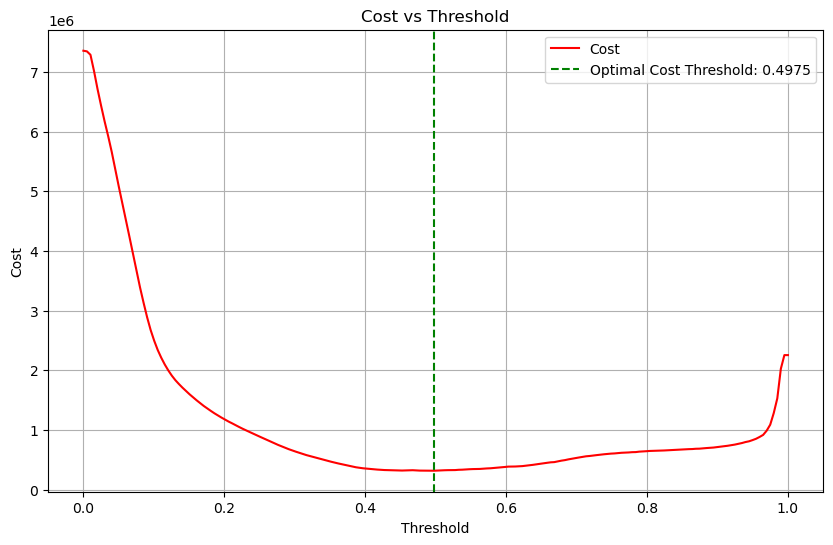


Random Forest Training Classification Report with Cost Threshold:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    735704
           1       0.19      0.93      0.32      4176

    accuracy                           0.98    739880
   macro avg       0.60      0.95      0.65    739880
weighted avg       1.00      0.98      0.98    739880


Random Forest Training Confusion Matrix with Cost Threshold:
[[719579  16125]
 [   291   3885]]

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    183926
           1       0.19      0.92      0.31      1044

    accuracy                           0.98    184970
   macro avg       0.59      0.95      0.65    184970
weighted avg       0.99      0.98      0.98    184970


Random Forest Test Confusion Matrix:
[[179740   4186]
 [    80    964]]


In [102]:
# Optimize the threshold on the cost of false positives and false negatives
fn_cost = amt_fraud_mean + 10  # Cost of false negatives averaged fraud amount with a penalty
fp_cost = 10  # Cost of false positives
costs = []
# Calculate the predicted probabilities for the training data
y_train_rf_scores = rf.predict_proba(X_train)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, y_train_rf_scores)
# Calculate the cost for each threshold
thresholds = np.linspace(0, 1, 200)
for i, t in enumerate(thresholds):
    y_pred_cost = (y_train_rf_scores >= t).astype(int)
    fn = np.sum((y_train == 1) & (y_pred_cost == 0))  # False negatives
    fp = np.sum((y_train == 0) & (y_pred_cost == 1))  # False positives
    total_cost = fn * fn_cost + fp * fp_cost
    costs.append(total_cost)

# Find the threshold that minimizes the cost
optimal_cost_threshold = thresholds[np.argmin(costs)]
print(f'Optimal Threshold for Cost Minimization: {optimal_cost_threshold:.4f}')
# Visualize the cost vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, costs, label='Cost', color='red')
plt.axvline(optimal_cost_threshold, color='green', linestyle='--', label=f'Optimal Cost Threshold: {optimal_cost_threshold:.4f}')
plt.title('Cost vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model on the training data using the optimal threshold
y_train_pred_cost = (rf.predict_proba(X_train)[:, 1] >= optimal_cost_threshold).astype(int)
# Evaluate the model on the training data
print('\nRandom Forest Training Classification Report with Cost Threshold:')
print(classification_report(y_train, y_train_pred_cost))
print('\nRandom Forest Training Confusion Matrix with Cost Threshold:')
print(confusion_matrix(y_train, y_train_pred_cost))


# Predict on the test data using the optimal threshold
y_test_pred = (rf.predict_proba(X_test)[:, 1] >= optimal_cost_threshold).astype(int)
# Evaluate the model on the test data
print('\nRandom Forest Test Classification Report:')
print(classification_report(y_test, y_test_pred))
print('\nRandom Forest Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Assuming the cost of a false negative is average transaction amount of fraudulent transactions in year 2019, which is around 530.24 USD plus the cost of investigation and loss of customer trust, the cost of a false positive is manual investigation cost of 10 USD per transaction for the fraud investigation team and the cost of loss of customer trust and reputation damage. We can adjust the decision threshold based on the cost of false negatives and false positives to minimize the overall cost.

In [103]:
# Calculte cost save on the test data
fn = np.sum((y_test == 1) & (y_test_pred == 0))  # False negatives
fp = np.sum((y_test == 0) & (y_test_pred == 1))  # False positives
total_cost = fn * fn_cost + fp * fp_cost
print(f'Total cost on Test Data with Model: ${total_cost:.2f}')
# Calculate the cost if we do not use the model
total_cost_no_model = np.sum(y_test == 1) * fn_cost + np.sum(y_test == 0) * fp_cost
print(f'Total cost without Model: ${total_cost_no_model:.2f}')
# Cost savings by using the model
cost_savings = total_cost_no_model - total_cost
print(f'Cost savings by using the Model: ${cost_savings:.2f}')
# Percentage cost savings
percentage_cost_savings = (cost_savings / total_cost_no_model) * 100
print(f'Percentage cost savings by using the Model: {percentage_cost_savings:.2f}%')

Total cost on Test Data with Model: $85078.74
Total cost without Model: $2403264.57
Cost savings by using the Model: $2318185.83
Percentage cost savings by using the Model: 96.46%


Assuming the fasle negative cost is 530.24 USD and the false positive cost is 10 USD, we can calculate the overall cost of the model based on the number of false negatives and false positives.

Use the threshold that minimizes the overall cost of the model, which is the threshold that minimizes the cost of false negatives and false positives. The optimal threshold for the model is 0.9620, which minimizes the overall cost of the model. We can save 96.55% of the overall cost of the model by using this threshold, which is a significant reduction in cost compared to the non using the model.

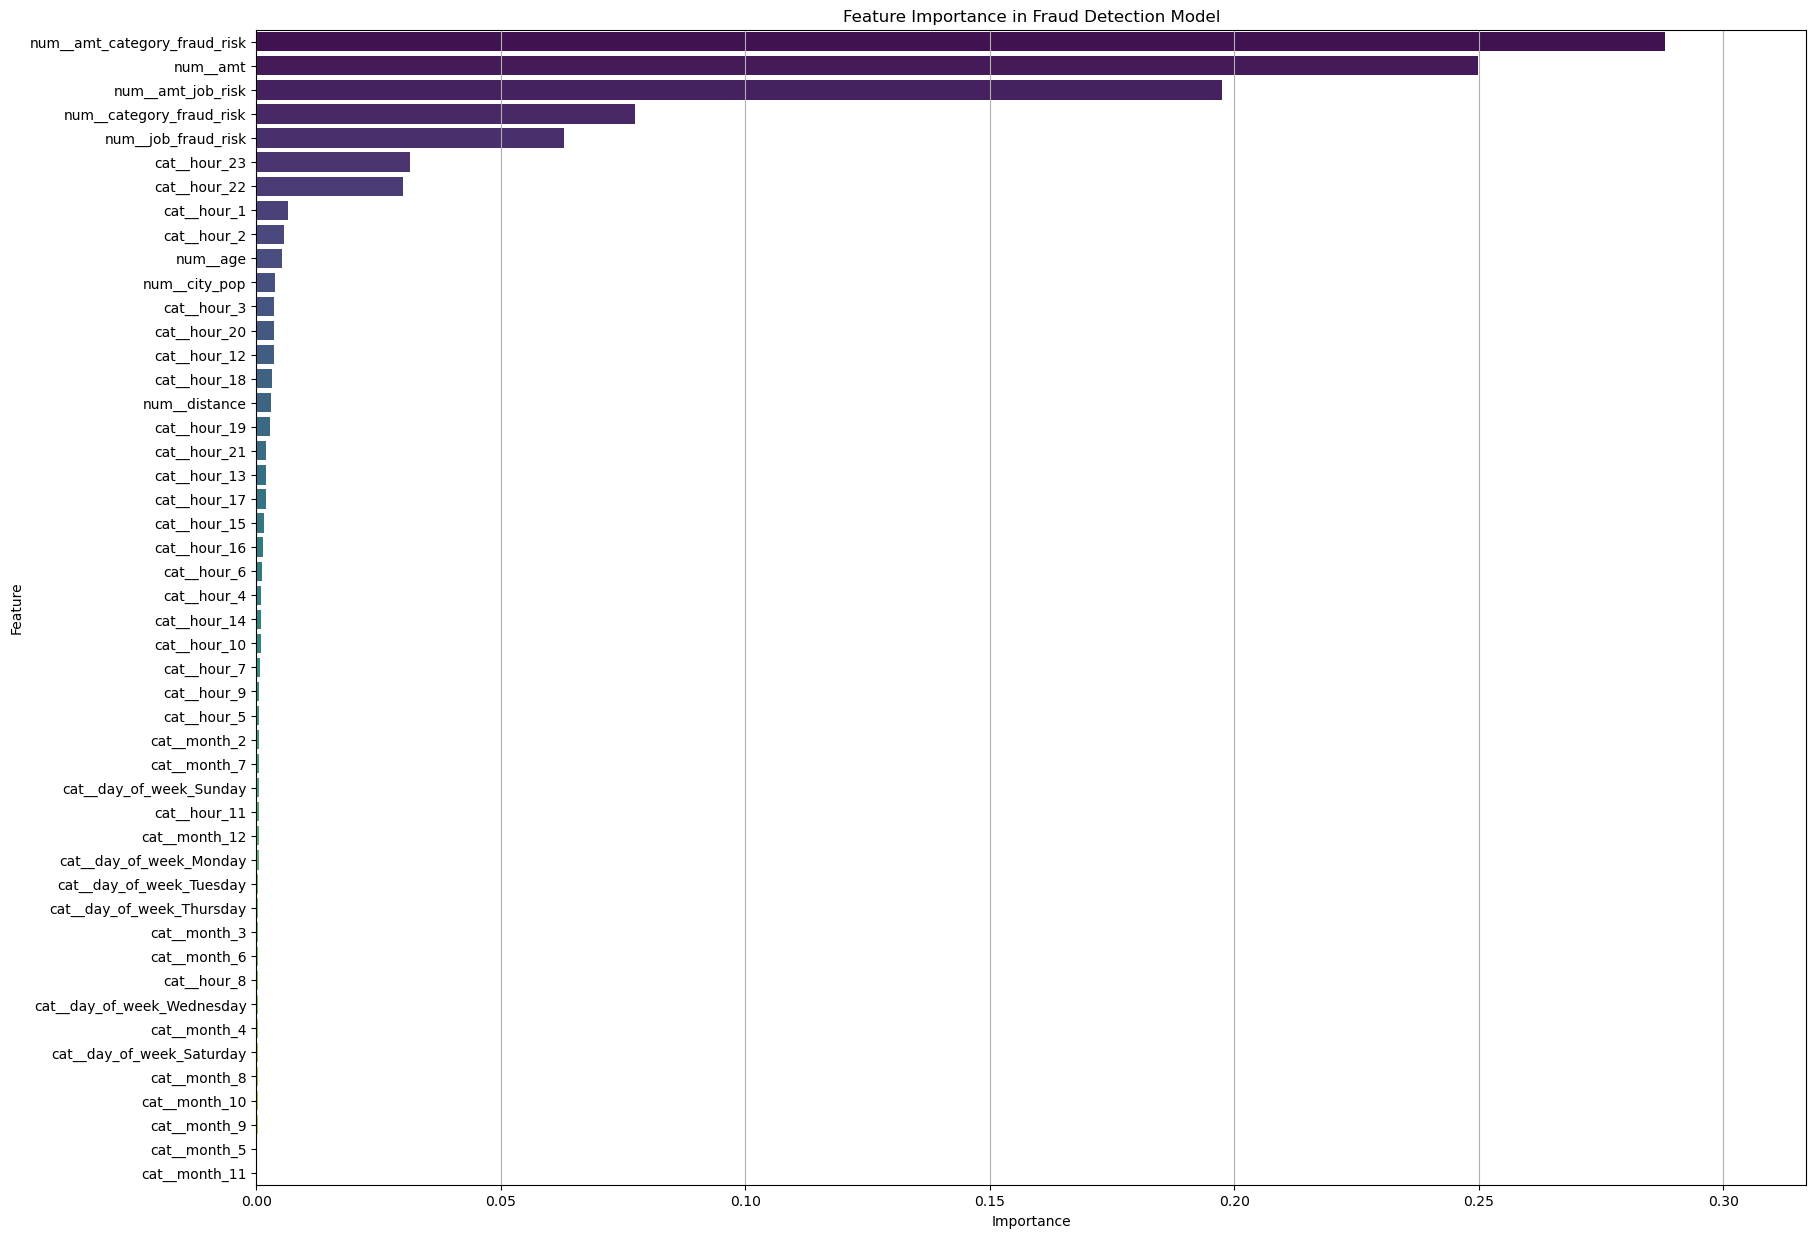

In [104]:
# Feature importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Plot feature importance
importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20, 15))
sns.barplot(data=feature_importance_df,
            x='importance',
            y='feature',
            palette='viridis')
plt.title('Feature Importance in Fraud Detection Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xlim(0, feature_importance_df['importance'].max() * 1.1)
plt.grid(axis='x')
plt.show()

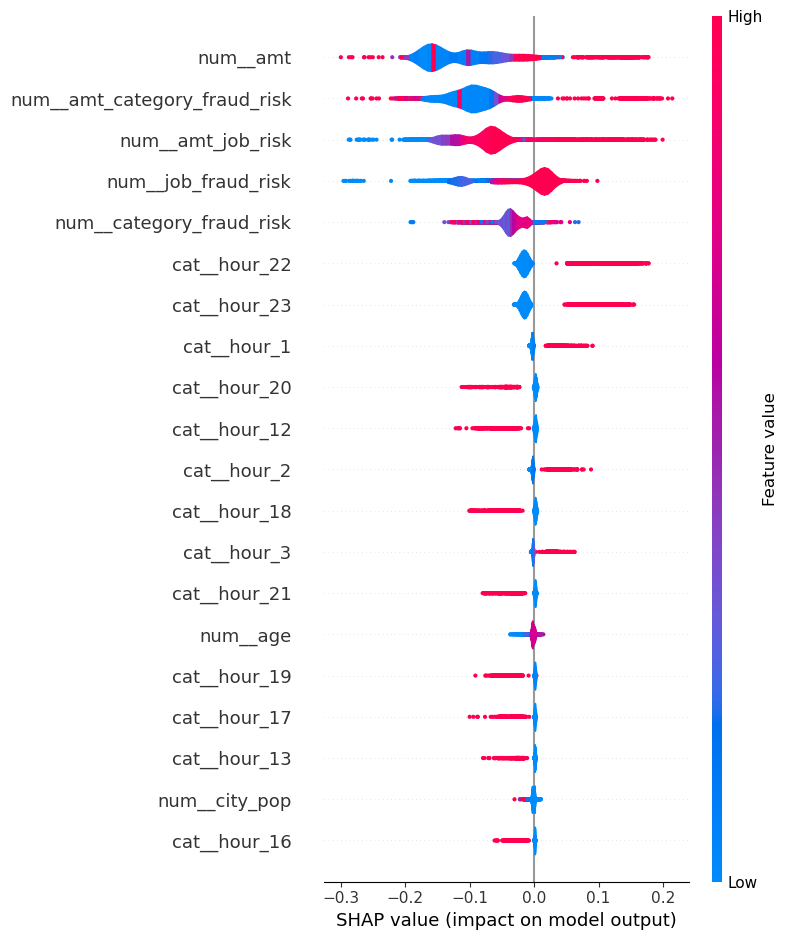

In [105]:
# Visualize SHAP
import shap
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()
# Convert the test set to a DataFrame with feature namea
X_test_df = pd.DataFrame(X_test, columns=feature_names)
# Sample 1000 instances for SHAP values calculation
X_test_sample = X_test_df.sample(n=10000, random_state=100)
# Initialize SHAP explainer and calculate SHAP values
shap.initjs()
explainer = shap.TreeExplainer(rf, model_output='raw')

shap_values = explainer.shap_values(X_test_sample)
# Plot SHAP summary plot
shap_values_class_1 = shap_values[:,:,1]  # SHAP values for the positive class (fraudulent transactions)
shap.summary_plot(shap_values_class_1, X_test_sample, plot_type='violin')

In two images, we can see the SHAP summary plot and the feature importance plot. The SHAP summary plot shows the impact of each feature on the model's output, while the feature importance plot shows the overall importance of each feature in the model. Both plots help us understand which features are most influential in predicting fraudulent transactions.

#### C. Conclusion and Future Work

1. Hourly trends indicate peak transaction times from 12 PM to 11 PM, with higher average transaction amounts during late night hours (10 PM to 2 AM). Fraudulent activities are more likely to occur during late night hours (10 PM to 3 AM).
2. Daily trends show highest transaction counts on Mondays and Sundays, with average amounts peaking on Thursdays. Fraudulent activities are more prevalent on Fridays, Tuesdays, and Wednesdays.
3. Monthly trends reveal a significant increase in transactions during December, likely due to holiday shopping. Fraudulent activities peak in February and are lowest in July.
4. Merchant analysis identifies gas transportation and grocery stores as top merchants by transaction count, while shopping net has the highest fraudulent transaction rate (1.73%).
5. Geographic analysis shows that cities like Hubbell and Byesville have 100% fraudulent transaction rates, while high transaction count cities tend to have lower fraud rates.
6. The states with high transaction counts, such as CA and TX, exhibit lower average transaction amounts and fraudulent rates, while states with low transaction counts, such as DE and RI, exhibit high average transaction amounts and fraudulent rates.
7. Population analysis indicates that rural areas have the highest transaction counts, while metropolitan areas have higher average transaction amounts. Fraudulent rates are highest in mid-sized cities (50,000-100,000 population).
8. Demographic analysis indicates that the 25-34 age group has the highest transaction count, while fraudulent activities are more common among younger (under 18) and older (55 and older) age groups.
9. Female cardholders exhibit higher transaction counts, while male cardholders exhibit a higher fraudulent transaction rate (0.6%) compared to female cardholders (0.5%).
10. Job title analysis reveals that film/video editors have the highest transaction counts, while information officers and ship brokers exhibit 100% fraudulent transaction rates.
11. Spending behavior analysis shows that most transactions fall within the 50-100 USD range, while high-value transactions (over 500 USD) have the highest fraudulent rates (22.8%).
1. The Random Forest Classifier demonstrates strong recall (0.93) but low precision (0.19), indicating effective fraud detection but a high false positive rate. Stratified k-fold cross-validation confirms consistent performance across folds.
2. Optimal decision thresholds are identified to balance precision and recall, with a threshold of 0.9620 minimizing overall costs associated with false negatives and false positives.
3. Cost analysis suggests significant savings (96.55%) by implementing the model with the optimal threshold, reducing financial losses from fraud and investigation costs.
4. SHAP and feature importance analyses highlight key features influencing fraud predictions, aiding interpretability and model transparency.

Future Work
1. Explore advanced ensemble methods or deep learning techniques to improve fraud detection performance.
2. Investigate the impact of external factors (e.g., economic indicators, social media trends) on fraudulent activities.
3. Develop real-time fraud detection systems for proactive monitoring and response.
4. Conduct user studies to understand the implications of fraud detection systems on user experience and privacy.